#Step 0: 환경 설정 및 라이브러리 설치

#Step 1: FLEURS 데이터셋 로드 및 STT 환경 준비

### 데이터 확인 및 로드

In [1]:
import os

# (중요) import ollama 전에 설정
os.environ["OLLAMA_HOST"] = "http://127.0.0.1:11434"
os.environ["NO_PROXY"] = "localhost,127.0.0.1,::1"

import ollama

client = ollama.Client(host=os.environ["OLLAMA_HOST"])
print(client.list())   # ✅ 여기서 모델 리스트 나오면 해결

models=[Model(model='gemma:2b', modified_at=datetime.datetime(2026, 2, 9, 16, 26, 23, 163583, tzinfo=TzInfo(32400)), digest='b50d6c999e592ae4f79acae23b4feaefbdfceaa7cd366df2610e3072c052a160', size=1678456656, details=ModelDetails(parent_model='', format='gguf', family='gemma', families=['gemma'], parameter_size='3B', quantization_level='Q4_0'))]


In [3]:
# 1. 허깅페이스 CLI 도구 설치
from huggingface_hub import snapshot_download
import os

# 2. FLEURS ja_jp 데이터셋 직접 다운로드
# 캐시를 남기지 않고 지정한 폴더로 바로 받습니다.
local_dir = "./fleurs_data"
snapshot_download(
    repo_id="google/fleurs",
    repo_type="dataset",
    allow_patterns="data/ja_jp/*", # 일본어 데이터 관련 파일만 선택
    local_dir=local_dir,
    local_dir_use_symlinks=False
)

snapshot_download(
    repo_id="google/fleurs",
    repo_type="dataset",
    allow_patterns="data/ko_kr/*", # 한국어 데이터 관련 파일만 선택
    local_dir=local_dir,
    local_dir_use_symlinks=False
)

print(f"✅ 다운로드 완료! 경로: {os.path.abspath(local_dir)}")

d:\Seonghee\26_AI_Scientist 고급\NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Seonghee\26_AI_Scientist 고급\NLP\.venv\Lib\site-packages\huggingface_hub\utils\_validators.py:202: UserWarning: The `local_dir_use_symlinks` argument is deprecated and ignored in `snapshot_download`. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
Fetching 6 files: 100%|██████████| 6/6 [03:23<00:00, 33.98s/it] 

✅ 다운로드 완료! 경로: d:\Seonghee\26_AI_Scientist 고급\NLP\fleurs_data


In [2]:
import os
import tarfile

ROOT = "./fleurs_data/data"   # 필요시 절대경로로 변경
LANG_DIRS = ["ja_jp/audio", "ko_kr/audio"]

def extract_test_targz(root):
    for rel in LANG_DIRS:
        folder = os.path.join(root, rel)
        if not os.path.isdir(folder):
            print(f"폴더 없음: {folder}")
            continue
        candidate = os.path.join(folder, "test.tar.gz")
        if not os.path.isfile(candidate):
            print(f"파일 없음: {candidate}")
            continue
        try:
            print(f"압축해제 시작: {candidate} -> {folder}")
            with tarfile.open(candidate, "r:gz") as tar:
                tar.extractall(path=folder)
            print(f"완료: {candidate}")
        except Exception as e:
            print(f"실패: {candidate} => {e}")
extract_test_targz(ROOT)

압축해제 시작: ./fleurs_data/data\ja_jp/audio\test.tar.gz -> ./fleurs_data/data\ja_jp/audio


C:\Users\next4\AppData\Local\Temp\ipykernel_22608\1316516391.py:20: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=folder)


완료: ./fleurs_data/data\ja_jp/audio\test.tar.gz
압축해제 시작: ./fleurs_data/data\ko_kr/audio\test.tar.gz -> ./fleurs_data/data\ko_kr/audio
완료: ./fleurs_data/data\ko_kr/audio\test.tar.gz


In [1]:
import os
from transformers import WhisperProcessor, WhisperForConditionalGeneration

# 1. 저장할 경로 설정 (절대 경로를 사용하는 것이 에러 방지에 좋습니다)
LOCAL_DIR = os.path.abspath("./whisper-tiny")

# 2. 서버에서 모델 불러오기
print("⏳ 모델 다운로드 중...")
model_id = "openai/whisper-tiny"
processor = WhisperProcessor.from_pretrained(model_id)
model = WhisperForConditionalGeneration.from_pretrained(model_id)

# 3. 로컬 디렉토리에 저장 (config.json 등 필수 파일이 생성됩니다)
processor.save_pretrained(LOCAL_DIR)
model.save_pretrained(LOCAL_DIR)

print(f"✅ 모델이 다음 경로에 저장되었습니다: {LOCAL_DIR}")

import torch
import os
from transformers import WhisperProcessor, WhisperForConditionalGeneration

# 저장된 절대 경로 사용
LOCAL_DIR = os.path.abspath("./whisper-tiny")
device = "cuda" if torch.cuda.is_available() else "cpu"

try:
    # local_files_only=True를 써서 인터넷 연결 없이 로드
    processor = WhisperProcessor.from_pretrained(LOCAL_DIR, local_files_only=True)
    whisper_model = WhisperForConditionalGeneration.from_pretrained(LOCAL_DIR, local_files_only=True).to(device)
    whisper_model.eval()
    
    print(f"✅ Whisper-tiny 로컬 로드 완료! / 사용 장치: {device}")
except Exception as e:
    print(f"❌ 로드 실패: {e}")
    print("💡 2단계의 저장 과정이 정상적으로 완료되었는지 확인해 주세요.")

d:\Seonghee\26_AI_Scientist 고급\NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


⏳ 모델 다운로드 중...


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


✅ 모델이 다음 경로에 저장되었습니다: d:\Seonghee\26_AI_Scientist 고급\NLP\whisper-tiny


Loading weights: 100%|██████████| 167/167 [00:00<00:00, 617.92it/s, Materializing param=model.encoder.layers.3.self_attn_layer_norm.weight]  


✅ Whisper-tiny 로컬 로드 완료! / 사용 장치: cpu


In [2]:
import pandas as pd

tsv_path = "./fleurs_data/data/ja_jp/test.tsv"

try:
    df = pd.read_csv(tsv_path, sep='\t', header=None)
    # 주요 컬럼 명칭 부여 (ID, 파일명, 원문, 번역본, ... , 카테고리)
    # 3번 컬럼이 일본어 원문, 8번 컬럼이 주제(Section)일 확률이 높습니다.
    df.columns = [f'col_{i}' for i in range(len(df.columns))]
    print(len(df.columns))
    # 우리가 쓸 핵심 컬럼만 정리 (경험적 위치 기반)
    # col_1: 파일명, col_2: 일본어 원문, col_8: 주제
    # df_clean = df[['col_1', 'col_2', 'col_8']].copy()
    # df_clean.columns = ['file_name', 'raw_text', 'category']

    print("✅ 데이터 로드 성공!")
    display(df.head())
except Exception as e:
    print(f"❌ 파일 읽기 실패: {e}")
    # 폴더 안의 파일 목록을 출력해서 경로를 다시 확인해봅니다.

7
✅ 데이터 로드 성공!


,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,1743,17808260654685775088.wav,技術決定論のほとんどの解釈は、2つの一般論を共有しています。1つは技術の発展自体が文化的・政...,技術決定論のほとんどの解釈は 2つの一般論を共有しています 1つは技術の発展自体が文化的 政...,技 術 決 定 論 の ほ と ん ど の 解 釈 は | 2 つ の 一 般 論 を 共 ...,361920,MALE
1,1754,9364520089078562923.wav,地殻が薄いため、近い方には海が多くなることがあります。溶岩が浮上しやすくなっていました。,地殻が薄いため 近い方には海が多くなることがあります 溶岩が浮上しやすくなっていました,地 殻 が 薄 い た め | 近 い 方 に は 海 が 多 く な る こ と が あ ...,171840,MALE
2,1822,8740859839695260023.wav,都市はモロッコのスルタンによってダルル・バディアとして再建され、貿易拠点を設立したスペイン人...,都市はモロッコのスルタンによってダルル バディアとして再建され 貿易拠点を設立したスペイン人...,都 市 は モ ロ ッ コ の ス ル タ ン に よ っ て ダ ル ル | バ デ ィ ...,278400,MALE
3,1822,1030930262884292674.wav,都市はモロッコのスルタンによってダルル・バディアとして再建され、貿易拠点を設立したスペイン人...,都市はモロッコのスルタンによってダルル バディアとして再建され 貿易拠点を設立したスペイン人...,都 市 は モ ロ ッ コ の ス ル タ ン に よ っ て ダ ル ル | バ デ ィ ...,224640,MALE
4,1841,4824217744848869807.wav,上空の澄んだ美しい空と、周囲の多くの山々以外には何も見えません。洞窟の中からは、外界はほとん...,上空の澄んだ美しい空と 周囲の多くの山々以外には何も見えません 洞窟の中からは 外界はほとん...,上 空 の 澄 ん だ 美 し い 空 と | 周 囲 の 多 く の 山 々 以 外 に ...,229440,MALE


In [3]:
# 전체 행, 열 개수 확인
print(f"데이터 모양: {df.shape}")

# 첫 번째 행의 '진짜' 끝까지 출력
print("첫 번째 샘플 전체 데이터:")
print(df.iloc[0].values)

데이터 모양: (650, 7)
첫 번째 샘플 전체 데이터:
[np.int64(1743) '17808260654685775088.wav'
 '技術決定論のほとんどの解釈は、2つの一般論を共有しています。1つは技術の発展自体が文化的・政治的な影響を大きく超えた道をたどっていること、もう1つは技術が社会的に条件づけられたものではなく、むしろ内在する社会に「影響」を与えることです。'
 '技術決定論のほとんどの解釈は 2つの一般論を共有しています 1つは技術の発展自体が文化的 政治的な影響を大きく超えた道をたどっていること もう1つは技術が社会的に条件づけられたものではなく むしろ内在する社会に 影響 を与えることです'
 '技 術 決 定 論 の ほ と ん ど の 解 釈 は | 2 つ の 一 般 論 を 共 有 し て い ま す | 1 つ は 技 術 の 発 展 自 体 が 文 化 的 | 政 治 的 な 影 響 を 大 き く 超 え た 道 を た ど っ て い る こ と | も う 1 つ は 技 術 が 社 会 的 に 条 件 づ け ら れ た も の で は な く | む し ろ 内 在 す る 社 会 に | 影 響 | を 与 え る こ と で す |'
 np.int64(361920) 'MALE']


#Step 3: 2B 모델 가설 검증 실험 (성별 Grounding)

In [4]:
import os
import torch
from transformers import WhisperProcessor, WhisperForConditionalGeneration
from huggingface_hub import snapshot_download

MODEL_ID = "openai/whisper-tiny"
LOCAL_DIR = "./whisper-tiny"   # 원하는 로컬 저장 위치

device = "cuda" if torch.cuda.is_available() else "cpu"

# 1) (최초 1회) 모델 파일을 로컬 폴더로 다운로드
#    이미 받아져 있으면 거의 바로 끝납니다.
os.makedirs(LOCAL_DIR, exist_ok=True)
snapshot_download(
    repo_id=MODEL_ID,
    local_dir=LOCAL_DIR,
    local_dir_use_symlinks=False,  # 윈도우/권한 이슈 줄이기
)

# 2) 로컬 폴더에서만 로드 (오프라인 강제)
processor = WhisperProcessor.from_pretrained(LOCAL_DIR, local_files_only=True)
model = WhisperForConditionalGeneration.from_pretrained(LOCAL_DIR, local_files_only=True).to(device)
model.eval()

def get_stt_result(speech_array, sampling_rate=16000, language="ko", task="transcribe"):
    """
    speech_array: 1D float array (권장: float32), 샘플레이트 16k 기준
    """
    # 입력 feature 생성
    inputs = processor(
        speech_array,
        sampling_rate=sampling_rate,
        return_tensors="pt"
    )
    input_features = inputs.input_features.to(device)

    # 디코딩 옵션(언어/작업) 지정
    forced_ids = processor.get_decoder_prompt_ids(language=language, task=task)

    with torch.no_grad():
        predicted_ids = model.generate(
            input_features,
            forced_decoder_ids=forced_ids,
        )

    text = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
    return text

print("✅ STT 엔진(Whisper Tiny) 로컬 로드 설정 완료! 이제 get_stt_result(...)로 테스트하세요.")

d:\Seonghee\26_AI_Scientist 고급\NLP\.venv\Lib\site-packages\huggingface_hub\utils\_validators.py:202: UserWarning: The `local_dir_use_symlinks` argument is deprecated and ignored in `snapshot_download`. Downloading to a local directory does not use symlinks anymore.
  warnings.warn(
Loading weights: 100%|██████████| 167/167 [00:00<00:00, 680.07it/s, Materializing param=model.encoder.layers.3.self_attn_layer_norm.weight]  


✅ STT 엔진(Whisper Tiny) 로컬 로드 설정 완료! 이제 get_stt_result(...)로 테스트하세요.


In [5]:
import ollama, os, re

os.environ["OLLAMA_HOST"] = "http://127.0.0.1:11434"
client = ollama.Client(host=os.environ["OLLAMA_HOST"])

SYSTEM = (
    "You are a translation engine. Translate Japanese to Korean.\n"
    "Output ONLY the Korean translation. No explanations. No quotes. No original Japanese."
)

def translate_ja_to_ko_debug(ja_text: str, model: str = "gemma:2b"):
    resp = client.chat(
        model=model,
        messages=[
            {"role": "system", "content": SYSTEM},
            {"role": "user", "content": ja_text},
        ],
        # ✅ 혹시 stream이 기본 True인 환경을 대비해 명시
        stream=False,
        options={"temperature": 0.0},
    )
    raw = resp["message"]["content"]
    print("----- RAW -----")
    print(repr(raw))  # <- 공백/개행까지 보이게
    return raw.strip()

out = translate_ja_to_ko_debug("今日はいい天気ですね。")
print("----- FINAL -----")
print(out)

----- RAW -----
'오늘은 좋은 날씨입니다.'
----- FINAL -----
오늘은 좋은 날씨입니다.


In [6]:
import pandas as pd

# 경로
ja_tsv_path = "./fleurs_data/data/ja_jp/test.tsv"
ja_audio_root = "./fleurs_data/data/ja_jp/audio/test"

ko_tsv_path = "./fleurs_data/data/ko_kr/test.tsv"
ko_audio_root = "./fleurs_data/data/ko_kr/audio/test"  # (이번 벤치마크에서는 참조 텍스트만 쓰면 오디오 사용 X)

# 로드
ja_df = pd.read_csv(ja_tsv_path, sep="\t", header=None)
ko_df = pd.read_csv(ko_tsv_path, sep="\t", header=None)

ja_df.columns = [f"col_{i}" for i in range(len(ja_df.columns))]
ko_df.columns = [f"col_{i}" for i in range(len(ko_df.columns))]

# 타입 통일 (merge 안정화)
ja_df["col_0"] = pd.to_numeric(ja_df["col_0"], errors="coerce").astype("Int64")
ko_df["col_0"] = pd.to_numeric(ko_df["col_0"], errors="coerce").astype("Int64")

# 핵심 컬럼 (네가 보여준 포맷 기준)
# ja: col_1=wav, col_2=일본어 정답 텍스트
# ko: col_1=wav, col_2=한국어 정답 텍스트 (일반적으로 동일 구조일 가능성 매우 높음)
JA_FILE_COL = "col_1"
JA_TEXT_COL = "col_2"
KO_TEXT_COL = "col_2"

# 중복 제거 전략: "first" 또는 "longest_text"
DEDUP_STRATEGY = "first"   # <- 요구사항 그대로면 first 권장

def dedup_by_col0(df: pd.DataFrame, text_col: str, strategy: str = "first") -> pd.DataFrame:
    df = df.copy()
    df = df.dropna(subset=["col_0"])  # ID 없는 행 제거

    if strategy == "first":
        # 입력 순서에서 col_0 당 첫 번째만 남김
        return df.drop_duplicates(subset=["col_0"], keep="first")

    if strategy == "longest_text":
        # col_0 당 text_col 길이가 가장 긴 행을 남김 (텍스트 품질이 더 안정적일 때가 많음)
        df["_len"] = df[text_col].astype(str).str.len()
        df = df.sort_values(["col_0", "_len"], ascending=[True, False])
        df = df.drop_duplicates(subset=["col_0"], keep="first").drop(columns=["_len"])
        return df

    raise ValueError("strategy must be 'first' or 'longest_text'")

ja_dup_cnt = ja_df.duplicated("col_0").sum()
ko_dup_cnt = ko_df.duplicated("col_0").sum()
print(f"중복 개수(원본): ja={ja_dup_cnt}, ko={ko_dup_cnt}")

ja_u = dedup_by_col0(ja_df, text_col=JA_TEXT_COL, strategy=DEDUP_STRATEGY)
ko_u = dedup_by_col0(ko_df, text_col=KO_TEXT_COL, strategy=DEDUP_STRATEGY)

print("중복 제거 후:", "ja=", ja_u.shape, "ko=", ko_u.shape)

# col_0 기준 inner join (col_0이 같은 문장만 사용)
merged = ja_u[["col_0", JA_FILE_COL, JA_TEXT_COL]].merge(
    ko_u[["col_0", KO_TEXT_COL]],
    on="col_0",
    how="inner",
    suffixes=("_ja", "_ko"),
)

merged = merged.rename(columns={
    "col_0": "sent_id",
    JA_FILE_COL: "ja_file",
    "col_2_ja": "ref_ja",
    "col_2_ko": "ref_ko",
})

print("✅ merge 결과:", merged.shape)
display(merged.head(3))

중복 개수(원본): ja=329, ko=112
중복 제거 후: ja= (321, 7) ko= (270, 7)
✅ merge 결과: (249, 4)


,sent_id,ja_file,ref_ja,ref_ko
0,1743,17808260654685775088.wav,技術決定論のほとんどの解釈は、2つの一般論を共有しています。1つは技術の発展自体が文化的・政...,기술 결정론에 대한 대부분의 해석은 두 가지 개념을 갖습니다. 기술 개발 자체가 문...
1,1754,9364520089078562923.wav,地殻が薄いため、近い方には海が多くなることがあります。溶岩が浮上しやすくなっていました。,지각(crust)이 더 얇기 때문에 가까운 쪽에 마리아(maria)가 더 많을 수 ...
2,1822,8740859839695260023.wav,都市はモロッコのスルタンによってダルル・バディアとして再建され、貿易拠点を設立したスペイン人...,"모로코 술탄은 다루 이 바드야(Daru l-Badya)라는 도시로 재건축하고, 여기..."


In [7]:
import torch
from transformers import WhisperProcessor, WhisperForConditionalGeneration

LOCAL_DIR = "./whisper-tiny"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = WhisperProcessor.from_pretrained(LOCAL_DIR, local_files_only=True)
whisper_model = WhisperForConditionalGeneration.from_pretrained(LOCAL_DIR, local_files_only=True).to(device)
whisper_model.eval()

print("✅ Whisper-tiny ready / device =", device)

Loading weights: 100%|██████████| 167/167 [00:00<00:00, 759.44it/s, Materializing param=model.encoder.layers.3.self_attn_layer_norm.weight]  


✅ Whisper-tiny ready / device = cpu


In [8]:
import os, re
import ollama

os.environ["OLLAMA_HOST"] = "http://127.0.0.1:11434"
os.environ["NO_PROXY"] = "localhost,127.0.0.1,::1"

client = ollama.Client(host=os.environ["OLLAMA_HOST"])

resp = client.list()
print("✅ Ollama models:", [m.model for m in resp.models])

OLLAMA_MODEL = "gemma:2b"
KO_RE = re.compile(r"[\uac00-\ud7a3]")

SYSTEM_JA2KO = (
    "You are a translation engine.\n"
    "Translate Japanese to Korean.\n"
    "Rules:\n"
    "- Output ONLY the Korean translation.\n"
    "- No explanations, no preface, no quotes, no original Japanese.\n"
)

def _extract_korean_line(raw: str) -> str:
    raw = (raw or "").strip()
    lines = [l.strip().strip('"').strip("'") for l in raw.splitlines() if l.strip()]
    ko_lines = [l for l in lines if KO_RE.search(l)]
    return ko_lines[-1] if ko_lines else raw

def ja_to_ko_safe(ja_text: str, model: str = OLLAMA_MODEL) -> str:
    resp = client.chat(
        model=model,
        messages=[
            {"role": "system", "content": SYSTEM_JA2KO},
            {"role": "user", "content": f"Japanese:\n{ja_text}\nKorean:"},
        ],
        stream=False,
        options={"temperature": 0.0},
    )
    raw = resp.get("message", {}).get("content", "")
    return _extract_korean_line(raw)

✅ Ollama models: ['gemma:2b']


In [9]:
import os, time
import librosa
from tqdm.auto import tqdm
from difflib import SequenceMatcher

def whisper_transcribe_ja(file_name: str, sampling_rate=16000) -> str:
    audio_path = os.path.join(ja_audio_root, str(file_name))
    if not os.path.exists(audio_path):
        raise FileNotFoundError(audio_path)

    speech, _ = librosa.load(audio_path, sr=sampling_rate)
    speech = speech.astype("float32")

    batch = processor(speech, sampling_rate=sampling_rate, return_tensors="pt")
    input_features = batch.input_features.to(device)

    gen_kwargs = dict(
        max_new_tokens=256,
        language="ja",
        task="transcribe",
    )
    if hasattr(batch, "attention_mask") and batch.attention_mask is not None:
        gen_kwargs["attention_mask"] = batch.attention_mask.to(device)

    with torch.no_grad():
        pred_ids = whisper_model.generate(input_features, **gen_kwargs)

    return processor.batch_decode(pred_ids, skip_special_tokens=True)[0].strip()

def char_similarity(a: str, b: str) -> float:
    return SequenceMatcher(None, (a or "").strip(), (b or "").strip()).ratio()

USE_SACREBLEU = False
try:
    import sacrebleu
    USE_SACREBLEU = True
    print("✅ sacrebleu 사용: BLEU/chrF 계산")
except Exception:
    print("⚠️ sacrebleu 미설치: char_similarity만 계산 (원하면 pip install sacrebleu)")

def compute_metrics(hyp_ko: str, ref_ko: str):
    hyp_ko = (hyp_ko or "").strip()
    ref_ko = (ref_ko or "").strip()
    out = {"char_sim": char_similarity(hyp_ko, ref_ko)}
    if USE_SACREBLEU:
        out["bleu"] = sacrebleu.corpus_bleu([hyp_ko], [[ref_ko]]).score
        out["chrf"] = sacrebleu.corpus_chrf([hyp_ko], [[ref_ko]]).score
    return out

# ---- 실행 ----
N = 10  # 평가 샘플 수
test = merged.dropna(subset=["ja_file", "ref_ko"]).head(N).copy()

rows = []
print(f"🚀 Benchmark start: N={len(test)}")

for _, r in tqdm(test.iterrows(), total=len(test)):
    sent_id = int(r["sent_id"])
    file_name = r["ja_file"]
    ref_ja = "" if pd.isna(r["ref_ja"]) else str(r["ref_ja"])
    ref_ko = "" if pd.isna(r["ref_ko"]) else str(r["ref_ko"])

    try:
        t0 = time.time()

        # 1) 일본어 STT (Whisper-tiny)
        stt_ja = whisper_transcribe_ja(file_name)

        # 2) 일본어 -> 한국어 번역 (Gemma 2B)
        hyp_ko = ja_to_ko_safe(stt_ja)

        dt = time.time() - t0

        # 3) 번역 품질 평가 (참조 한국어 vs 예측 한국어)
        m = compute_metrics(hyp_ko, ref_ko)

        rows.append({
            "sent_id": sent_id,
            "ja_file": file_name,
            "ref_ja": ref_ja,
            "stt_ja": stt_ja,
            "ref_ko": ref_ko,
            "hyp_ko": hyp_ko,
            "latency_sec": dt,
            **m
        })

    except Exception as e:
        rows.append({
            "sent_id": sent_id,
            "ja_file": file_name,
            "error": str(e)
        })

results_df = pd.DataFrame(rows)
print("✅ done:", results_df.shape)
display(results_df.head(5))


✅ sacrebleu 사용: BLEU/chrF 계산
🚀 Benchmark start: N=10


  0%|          | 0/10 [00:00<?, ?it/s]The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Both `max_new_tokens` (=256) and `max_length`(=448) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
A custom logits processor of type <class 'transformers.generation.logits_process.SuppressTokensLogitsProcessor'> has been passed to `.generate()`, but it was also created in `.generate()`, given its parameterization. The custom <class 'transformers.generation.logits_process.SuppressTokensLogitsProcessor'> will take precedence. Please check the docstring of <class 'transformers.generation.logits_process.SuppressTokensLogitsProcessor'> to see related `.generate()` flags.
A custom 

✅ done: (10, 10)


,sent_id,ja_file,ref_ja,stt_ja,ref_ko,hyp_ko,latency_sec,char_sim,bleu,chrf
0,1743,17808260654685775088.wav,技術決定論のほとんどの解釈は、2つの一般論を共有しています。1つは技術の発展自体が文化的・政...,基礎つけているのほとんどの会社は2つの一般論を強いしています。一つは技術な発展したいが分かっ...,기술 결정론에 대한 대부분의 해석은 두 가지 개념을 갖습니다. 기술 개발 자체가 문...,"기반적으로 2개의 일반적인 발전 방식이 존재하며, 하나는 기술적인 발전을 위한 도전...",8.724139,0.295238,1.300657,9.073918
1,1754,9364520089078562923.wav,地殻が薄いため、近い方には海が多くなることがあります。溶岩が浮上しやすくなっていました。,近くは遅いたね近い方に海が多くなることがあります。坂岸が不常しやすくなっていました。,지각(crust)이 더 얇기 때문에 가까운 쪽에 마리아(maria)가 더 많을 수 ...,백록한 계곡의 험난한 경계가 불안해졌습니다.,4.457151,0.138614,0.207475,1.288356
2,1822,8740859839695260023.wav,都市はモロッコのスルタンによってダルル・バディアとして再建され、貿易拠点を設立したスペイン人...,としは、森っこのするターンによって、ダルルバリアとして採験され、森を切り付けたスペインジン・...,"모로코 술탄은 다루 이 바드야(Daru l-Badya)라는 도시로 재건축하고, 여기...","소리는, 숲의 밖에서 탈출하여 ダルル바리아로 떨어졌고, 숲을 쳐서 스페인지의 송림에...",5.193193,0.246377,1.775668,5.084660
3,1841,4824217744848869807.wav,上空の澄んだ美しい空と、周囲の多くの山々以外には何も見えません。洞窟の中からは、外界はほとん...,超高のスンターツクシースラと周囲の多くの山山以外に何分に言えません。多く進んだことは、デカイ...,산을 둘러싸고 있는 맑고 아름다운 하늘밖에는 보이지 않는다. 이 동굴 안에서는 바깥...,"超高의スンターツクシースラと周囲의 많은 산산이 아니라, 어떻게 몇 만에 이루어지는지 ...",4.742909,0.170940,2.358642,4.039173
4,1876,15381272810814802884.wav,北マリアナ諸島の危機管理室（EMO）によると、全国的に被害は報告されていないとのことです。,北丸野ショトをもっき機関率、イMをによると全国的に被害は報告されていないとのことです。,북 마리아나 재난관리청은 국가적으로 어떤 피해도 보고되지 않았다고 밝혔다.,北丸野ショトをもっき機関率、イMをによると全国的に被害は報告されていないとのことです。,3.241317,0.000000,0.000000,0.000000


In [10]:
ok = results_df[results_df.get("error").isna()] if "error" in results_df.columns else results_df
print("정상:", len(ok), "/", len(results_df))

if ok.empty:
    display(results_df[["sent_id","ja_file","error"]].head(30))
else:
    metrics = ["char_sim"] + (["bleu", "chrf"] if USE_SACREBLEU else [])
    summary = {f"{k}_mean": ok[k].mean() for k in metrics}
    summary["latency_sec_mean"] = ok["latency_sec"].mean()
    display(pd.DataFrame([summary]))

    display(ok.sort_values("char_sim", ascending=False)[["sent_id","ja_file","char_sim","ref_ko","hyp_ko","stt_ja"]].head(5))
    display(ok.sort_values("char_sim", ascending=True)[["sent_id","ja_file","char_sim","ref_ko","hyp_ko","stt_ja"]].head(5))


정상: 10 / 10


,char_sim_mean,bleu_mean,chrf_mean,latency_sec_mean
0,0.22588,1.458877,6.827389,4.918733


,sent_id,ja_file,char_sim,ref_ko,hyp_ko,stt_ja
6,1944,13965438796589242057.wav,0.427350,"이들 해변은 대개 혼잡하지 않은 가족 해변으로, 해안가에는 다양한 상점이 늘어서 있...",이러한 가족의 毛이 다양한 점이 바닥에 혼재되어 있으므로 해당 지역의 안전은 매우 ...,これらはたまに混雑する家族の毛のビーチで海外にはさまざまな点ぼも並んでいます安全におやくこと...
7,1691,13548897059510104589.wav,0.363636,대기업은 일부 항로에서 자사 소속 항공기를 사용합니다만 그밖에 다른 항로이거나 소기...,1부의 탄력성에서는 대기업은 자리에 있거나 그 외의 탄력이나 경영 기업에도 문제가 ...,1部の弾戚性では大企業は自席を持っているかそれ以外の弾性や商機も企業では問題があった
9,1714,3563562150682074308.wav,0.329412,인공위성은 로켓으로 우주에 발사되었습니다. 과학자들은 지구의 대기가 우리의 빛과 시...,映像는 로켓에서 우주로 보내졌습니다. 과학자는 우주에서의 탐험과 교육을 위해 자연스...,映像はロケットで宇宙に送られました。科学者が宇宙で、冒険教室科を自由は地球の体験によって人間...
0,1743,17808260654685775088.wav,0.295238,기술 결정론에 대한 대부분의 해석은 두 가지 개념을 갖습니다. 기술 개발 자체가 문...,"기반적으로 2개의 일반적인 발전 방식이 존재하며, 하나는 기술적인 발전을 위한 도전...",基礎つけているのほとんどの会社は2つの一般論を強いしています。一つは技術な発展したいが分かっ...
8,1983,2897195784813296214.wav,0.287234,"문명이라는 단어는 '시민답다'를 뜻하는 라틴어 시빌리스(civilis), 시민을 뜻...",1명은 시민을 의미하는 것과 관련된 지하철을 이용하는 모습에서 시민을 의미하는 것과...,1名ということは市民を意味するら点側の経用しシビルを使う機動に市民を意味するら点側の明治、市...


,sent_id,ja_file,char_sim,ref_ko,hyp_ko,stt_ja
5,1679,12283431306979433028.wav,0.000000,에어로스미스는 투어 콘서트의 남아있는 공연들을 취소했다.,エアロスミスはツアーで予定していたコンサートを中止しました。,エアロスミスはツアーで予定していたコンサートを中止しました。
4,1876,15381272810814802884.wav,0.000000,북 마리아나 재난관리청은 국가적으로 어떤 피해도 보고되지 않았다고 밝혔다.,北丸野ショトをもっき機関率、イMをによると全国的に被害は報告されていないとのことです。,北丸野ショトをもっき機関率、イMをによると全国的に被害は報告されていないとのことです。
1,1754,9364520089078562923.wav,0.138614,지각(crust)이 더 얇기 때문에 가까운 쪽에 마리아(maria)가 더 많을 수 ...,백록한 계곡의 험난한 경계가 불안해졌습니다.,近くは遅いたね近い方に海が多くなることがあります。坂岸が不常しやすくなっていました。
3,1841,4824217744848869807.wav,0.170940,산을 둘러싸고 있는 맑고 아름다운 하늘밖에는 보이지 않는다. 이 동굴 안에서는 바깥...,"超高의スンターツクシースラと周囲의 많은 산산이 아니라, 어떻게 몇 만에 이루어지는지 ...",超高のスンターツクシースラと周囲の多くの山山以外に何分に言えません。多く進んだことは、デカイ...
2,1822,8740859839695260023.wav,0.246377,"모로코 술탄은 다루 이 바드야(Daru l-Badya)라는 도시로 재건축하고, 여기...","소리는, 숲의 밖에서 탈출하여 ダルル바리아로 떨어졌고, 숲을 쳐서 스페인지의 송림에...",としは、森っこのするターンによって、ダルルバリアとして採験され、森を切り付けたスペインジン・...


In [11]:
from difflib import SequenceMatcher
def sim(a,b): return SequenceMatcher(None, (a or "").strip(), (b or "").strip()).ratio()

ok = results_df[results_df.get("error").isna()] if "error" in results_df.columns else results_df
ok["stt_sim"] = ok.apply(lambda r: sim(r["stt_ja"], r["ref_ja"]), axis=1)
ok["stt_sim"].describe()

count    10.000000
mean      0.710877
std       0.141914
min       0.492611
25%       0.605949
50%       0.731773
75%       0.763081
max       1.000000
Name: stt_sim, dtype: float64

In [12]:
rows2 = []
for _, r in merged.dropna(subset=["ref_ja","ref_ko"]).head(N).iterrows():
    hyp = ja_to_ko_safe(str(r["ref_ja"]))
    m = compute_metrics(hyp, str(r["ref_ko"]))
    rows2.append({**m})
pd.DataFrame(rows2).mean()

char_sim     0.310947
bleu         2.287398
chrf        11.436985
dtype: float64

In [13]:
ok.sort_values("stt_sim").head(10)[["sent_id","ja_file","stt_sim","ref_ja","stt_ja"]]

,sent_id,ja_file,stt_sim,ref_ja,stt_ja
8,1983,2897195784813296214.wav,0.492611,文明という言葉は、市民を意味するラテン語の形容詞civilisから来ており、市民を意味するラ...,1名ということは市民を意味するら点側の経用しシビルを使う機動に市民を意味するら点側の明治、市...
3,1841,4824217744848869807.wav,0.580153,上空の澄んだ美しい空と、周囲の多くの山々以外には何も見えません。洞窟の中からは、外界はほとん...,超高のスンターツクシースラと周囲の多くの山山以外に何分に言えません。多く進んだことは、デカイ...
2,1822,8740859839695260023.wav,0.588235,都市はモロッコのスルタンによってダルル・バディアとして再建され、貿易拠点を設立したスペイン人...,としは、森っこのするターンによって、ダルルバリアとして採験され、森を切り付けたスペインジン・...
4,1876,15381272810814802884.wav,0.659091,北マリアナ諸島の危機管理室（EMO）によると、全国的に被害は報告されていないとのことです。,北丸野ショトをもっき機関率、イMをによると全国的に被害は報告されていないとのことです。
7,1691,13548897059510104589.wav,0.720930,一部の路線では大企業は自社機を持っているが、それ以外の路線や小規模企業では問題があった。,1部の弾戚性では大企業は自席を持っているかそれ以外の弾性や商機も企業では問題があった
0,1743,17808260654685775088.wav,0.742616,技術決定論のほとんどの解釈は、2つの一般論を共有しています。1つは技術の発展自体が文化的・政...,基礎つけているのほとんどの会社は2つの一般論を強いしています。一つは技術な発展したいが分かっ...
9,1714,3563562150682074308.wav,0.750000,衛星はロケットで宇宙に送られました。科学者が宇宙で望遠鏡を使う理由は、地球の大気によって人間...,映像はロケットで宇宙に送られました。科学者が宇宙で、冒険教室科を自由は地球の体験によって人間...
1,1754,9364520089078562923.wav,0.767442,地殻が薄いため、近い方には海が多くなることがあります。溶岩が浮上しやすくなっていました。,近くは遅いたね近い方に海が多くなることがあります。坂岸が不常しやすくなっていました。
6,1944,13965438796589242057.wav,0.807692,これらはたまに混雑する家族向けのビーチで、海岸にはさまざまな店舗が並んでいます。安全に泳ぐこ...,これらはたまに混雑する家族の毛のビーチで海外にはさまざまな点ぼも並んでいます安全におやくこと...
5,1679,12283431306979433028.wav,1.000000,エアロスミスはツアーで予定していたコンサートを中止しました。,エアロスミスはツアーで予定していたコンサートを中止しました。


In [14]:
import pandas as pd
from difflib import SequenceMatcher

def sim(a,b):
    return SequenceMatcher(None, (a or "").strip(), (b or "").strip()).ratio()

# ok: error 없는 샘플만
ok = results_df[results_df.get("error").isna()] if "error" in results_df.columns else results_df.copy()

# stt_sim 없으면 생성
if "stt_sim" not in ok.columns:
    ok["stt_sim"] = ok.apply(lambda r: sim(r.get("stt_ja",""), r.get("ref_ja","")), axis=1)

print("정상 샘플 수:", len(ok), "/", len(results_df))
ok.head(3)

정상 샘플 수: 10 / 10


,sent_id,ja_file,ref_ja,stt_ja,ref_ko,hyp_ko,latency_sec,char_sim,bleu,chrf,stt_sim
0,1743,17808260654685775088.wav,技術決定論のほとんどの解釈は、2つの一般論を共有しています。1つは技術の発展自体が文化的・政...,基礎つけているのほとんどの会社は2つの一般論を強いしています。一つは技術な発展したいが分かっ...,기술 결정론에 대한 대부분의 해석은 두 가지 개념을 갖습니다. 기술 개발 자체가 문...,"기반적으로 2개의 일반적인 발전 방식이 존재하며, 하나는 기술적인 발전을 위한 도전...",8.724139,0.295238,1.300657,9.073918,0.742616
1,1754,9364520089078562923.wav,地殻が薄いため、近い方には海が多くなることがあります。溶岩が浮上しやすくなっていました。,近くは遅いたね近い方に海が多くなることがあります。坂岸が不常しやすくなっていました。,지각(crust)이 더 얇기 때문에 가까운 쪽에 마리아(maria)가 더 많을 수 ...,백록한 계곡의 험난한 경계가 불안해졌습니다.,4.457151,0.138614,0.207475,1.288356,0.767442
2,1822,8740859839695260023.wav,都市はモロッコのスルタンによってダルル・バディアとして再建され、貿易拠点を設立したスペイン人...,としは、森っこのするターンによって、ダルルバリアとして採験され、森を切り付けたスペインジン・...,"모로코 술탄은 다루 이 바드야(Daru l-Badya)라는 도시로 재건축하고, 여기...","소리는, 숲의 밖에서 탈출하여 ダルル바리아로 떨어졌고, 숲을 쳐서 스페인지의 송림에...",5.193193,0.246377,1.775668,5.084660,0.588235


In [15]:
import numpy as np

def summarize_col(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce")
    return pd.Series({
        "count": s.count(),
        "mean": s.mean(),
        "std": s.std(),
        "min": s.min(),
        "25%": s.quantile(0.25),
        "50%": s.quantile(0.50),
        "75%": s.quantile(0.75),
        "max": s.max(),
    })

metrics = []
for c in ["char_sim", "bleu", "chrf", "stt_sim", "latency_sec"]:
    if c in ok.columns:
        metrics.append(c)

summary = pd.concat({c: summarize_col(ok[c]) for c in metrics}, axis=1).T
display(summary)

# 텍스트 길이(참고용): STT/번역 출력이 너무 짧거나 긴지 확인
len_stats = pd.DataFrame({
    "stt_ja_len": ok["stt_ja"].fillna("").astype(str).str.len().describe(),
    "hyp_ko_len": ok["hyp_ko"].fillna("").astype(str).str.len().describe(),
    "ref_ko_len": ok["ref_ko"].fillna("").astype(str).str.len().describe(),
}).T
display(len_stats)

,count,mean,std,min,25%,50%,75%,max
char_sim,10.0,0.225880,0.146043,0.000000,0.146695,0.266805,0.320868,0.427350
bleu,10.0,1.458877,1.234460,0.000000,0.368826,1.538163,2.216774,3.764426
chrf,10.0,6.827389,5.837474,0.000000,1.976060,6.392967,10.524617,17.666929
stt_sim,10.0,0.710877,0.141914,0.492611,0.605949,0.731773,0.763081,1.000000
latency_sec,10.0,4.918733,1.821884,2.266204,4.062167,4.600030,5.565428,8.724139


,count,mean,std,min,25%,50%,75%,max
stt_ja_len,10.0,62.7,27.519892,30.0,42.25,59.0,68.75,119.0
hyp_ko_len,10.0,55.7,23.579888,24.0,44.75,52.0,59.50,95.0
ref_ko_len,10.0,73.9,29.583967,31.0,61.25,70.0,81.50,127.0


,target,pearson,spearman
0,char_sim,-0.215123,0.054711
1,bleu,-0.193835,-0.115502
2,chrf,-0.079126,0.006079


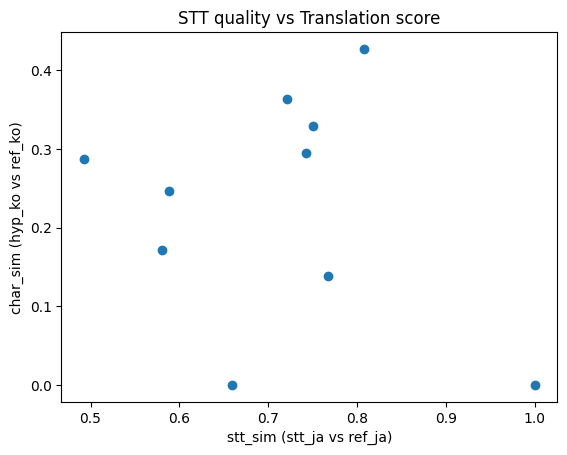

In [16]:
import matplotlib.pyplot as plt

# 상관(스피어만/피어슨 둘 다)
targets = [c for c in ["char_sim", "bleu", "chrf"] if c in ok.columns]
corr_rows = []
for t in targets:
    corr_rows.append({
        "target": t,
        "pearson": ok[["stt_sim", t]].corr(method="pearson").iloc[0,1],
        "spearman": ok[["stt_sim", t]].corr(method="spearman").iloc[0,1],
    })
corr_df = pd.DataFrame(corr_rows)
display(corr_df)

# 산점도: stt_sim vs char_sim
if "char_sim" in ok.columns:
    plt.figure()
    plt.scatter(ok["stt_sim"], ok["char_sim"])
    plt.xlabel("stt_sim (stt_ja vs ref_ja)")
    plt.ylabel("char_sim (hyp_ko vs ref_ko)")
    plt.title("STT quality vs Translation score")
    plt.show()

In [18]:
TOPK = 3

# 번역 점수 기준 상/하
if "char_sim" in ok.columns:
    display(ok.sort_values("char_sim", ascending=False)[
        ["sent_id","ja_file","char_sim","stt_sim","ref_ko","hyp_ko","ref_ja","stt_ja"]
    ].head(TOPK))

    display(ok.sort_values("char_sim", ascending=True)[
        ["sent_id","ja_file","char_sim","stt_sim","ref_ko","hyp_ko","ref_ja","stt_ja"]
    ].head(TOPK))

# STT 품질 하위
display(ok.sort_values("stt_sim", ascending=True)[
    ["sent_id","ja_file","stt_sim","ref_ja","stt_ja"]
].head(TOPK))

,sent_id,ja_file,char_sim,stt_sim,ref_ko,hyp_ko,ref_ja,stt_ja
6,1944,13965438796589242057.wav,0.427350,0.807692,"이들 해변은 대개 혼잡하지 않은 가족 해변으로, 해안가에는 다양한 상점이 늘어서 있...",이러한 가족의 毛이 다양한 점이 바닥에 혼재되어 있으므로 해당 지역의 안전은 매우 ...,これらはたまに混雑する家族向けのビーチで、海岸にはさまざまな店舗が並んでいます。安全に泳ぐこ...,これらはたまに混雑する家族の毛のビーチで海外にはさまざまな点ぼも並んでいます安全におやくこと...
7,1691,13548897059510104589.wav,0.363636,0.720930,대기업은 일부 항로에서 자사 소속 항공기를 사용합니다만 그밖에 다른 항로이거나 소기...,1부의 탄력성에서는 대기업은 자리에 있거나 그 외의 탄력이나 경영 기업에도 문제가 ...,一部の路線では大企業は自社機を持っているが、それ以外の路線や小規模企業では問題があった。,1部の弾戚性では大企業は自席を持っているかそれ以外の弾性や商機も企業では問題があった
9,1714,3563562150682074308.wav,0.329412,0.750000,인공위성은 로켓으로 우주에 발사되었습니다. 과학자들은 지구의 대기가 우리의 빛과 시...,映像는 로켓에서 우주로 보내졌습니다. 과학자는 우주에서의 탐험과 교육을 위해 자연스...,衛星はロケットで宇宙に送られました。科学者が宇宙で望遠鏡を使う理由は、地球の大気によって人間...,映像はロケットで宇宙に送られました。科学者が宇宙で、冒険教室科を自由は地球の体験によって人間...


,sent_id,ja_file,char_sim,stt_sim,ref_ko,hyp_ko,ref_ja,stt_ja
5,1679,12283431306979433028.wav,0.000000,1.000000,에어로스미스는 투어 콘서트의 남아있는 공연들을 취소했다.,エアロスミスはツアーで予定していたコンサートを中止しました。,エアロスミスはツアーで予定していたコンサートを中止しました。,エアロスミスはツアーで予定していたコンサートを中止しました。
4,1876,15381272810814802884.wav,0.000000,0.659091,북 마리아나 재난관리청은 국가적으로 어떤 피해도 보고되지 않았다고 밝혔다.,北丸野ショトをもっき機関率、イMをによると全国的に被害は報告されていないとのことです。,北マリアナ諸島の危機管理室（EMO）によると、全国的に被害は報告されていないとのことです。,北丸野ショトをもっき機関率、イMをによると全国的に被害は報告されていないとのことです。
1,1754,9364520089078562923.wav,0.138614,0.767442,지각(crust)이 더 얇기 때문에 가까운 쪽에 마리아(maria)가 더 많을 수 ...,백록한 계곡의 험난한 경계가 불안해졌습니다.,地殻が薄いため、近い方には海が多くなることがあります。溶岩が浮上しやすくなっていました。,近くは遅いたね近い方に海が多くなることがあります。坂岸が不常しやすくなっていました。


,sent_id,ja_file,stt_sim,ref_ja,stt_ja
8,1983,2897195784813296214.wav,0.492611,文明という言葉は、市民を意味するラテン語の形容詞civilisから来ており、市民を意味するラ...,1名ということは市民を意味するら点側の経用しシビルを使う機動に市民を意味するら点側の明治、市...
3,1841,4824217744848869807.wav,0.580153,上空の澄んだ美しい空と、周囲の多くの山々以外には何も見えません。洞窟の中からは、外界はほとん...,超高のスンターツクシースラと周囲の多くの山山以外に何分に言えません。多く進んだことは、デカイ...
2,1822,8740859839695260023.wav,0.588235,都市はモロッコのスルタンによってダルル・バディアとして再建され、貿易拠点を設立したスペイン人...,としは、森っこのするターンによって、ダルルバリアとして採験され、森を切り付けたスペインジン・...


In [19]:
import re

JP_CHAR = re.compile(r"[\u3040-\u30ff\u4e00-\u9fff]")

def is_stt_suspicious(text: str) -> bool:
    t = (text or "").strip()
    if len(t) < 10:
        return True
    if re.search(r"(.)\1{6,}", t):   # 동일 문자 7회 이상 반복
        return True
    jp_cnt = len(JP_CHAR.findall(t))
    if jp_cnt / max(1, len(t)) < 0.25:  # 일본어 비율이 너무 낮으면 이상
        return True
    return False

ok["stt_suspicious"] = ok["stt_ja"].astype(str).apply(is_stt_suspicious)
print("의심 샘플 수:", ok["stt_suspicious"].sum(), "/", len(ok))

display(ok[ok["stt_suspicious"]][["sent_id","ja_file","stt_sim","stt_ja"]].head(20))

의심 샘플 수: 0 / 10


,sent_id,ja_file,stt_sim,stt_ja


In [20]:
out_path = "./benchmark_results_baseline.csv"
ok.to_csv(out_path, index=False, encoding="utf-8-sig")
print("✅ saved:", out_path)

# 요약표도 저장
summary_path = "./benchmark_summary_baseline.csv"
summary.to_csv(summary_path, index=True, encoding="utf-8-sig")
print("✅ saved:", summary_path)

✅ saved: ./benchmark_results_baseline.csv
✅ saved: ./benchmark_summary_baseline.csv


# 개선 코드

In [21]:
import unicodedata

def clean_stt_ja(text: str) -> str:
    t = "" if text is None else str(text)
    t = unicodedata.normalize("NFKC", t)
    # 동일 문자 4회 이상 반복 -> 3회로 축약 (폭주 완화)
    t = re.sub(r"(.)\1{3,}", r"\1\1\1", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

def stt_bad(text: str) -> bool:
    t = (text or "").strip()
    if len(t) < 10:
        return True
    if len(t) > 1200:
        return True
    if re.search(r"(.)\1{6,}", t):
        return True
    jp_cnt = len(JP_CHAR.findall(t))
    if jp_cnt / max(1, len(t)) < 0.25:
        return True
    return False

def whisper_transcribe_ja_v2(file_name: str, sampling_rate=16000) -> str:
    audio_path = os.path.join(ja_audio_root, str(file_name))
    if not os.path.exists(audio_path):
        raise FileNotFoundError(audio_path)

    speech, _ = librosa.load(audio_path, sr=sampling_rate)
    speech = speech.astype("float32")

    batch = processor(speech, sampling_rate=sampling_rate, return_tensors="pt")
    input_features = batch.input_features.to(device)

    # 1차(빠르고 보수적으로)
    gen1 = dict(
        language="ja",
        task="transcribe",
        max_new_tokens=128,
    )
    if hasattr(batch, "attention_mask") and batch.attention_mask is not None:
        gen1["attention_mask"] = batch.attention_mask.to(device)

    with torch.no_grad():
        pred1 = whisper_model.generate(input_features, **gen1)
    t1 = processor.batch_decode(pred1, skip_special_tokens=True)[0].strip()
    t1 = clean_stt_ja(t1)

    if not stt_bad(t1):
        return t1

    # 2차(의심 샘플만 재시도: 반복 억제 + beam)
    gen2 = dict(
        language="ja",
        task="transcribe",
        max_new_tokens=128,
        num_beams=4,
        no_repeat_ngram_size=3,
        repetition_penalty=1.15,
    )
    if hasattr(batch, "attention_mask") and batch.attention_mask is not None:
        gen2["attention_mask"] = batch.attention_mask.to(device)

    with torch.no_grad():
        pred2 = whisper_model.generate(input_features, **gen2)
    t2 = processor.batch_decode(pred2, skip_special_tokens=True)[0].strip()
    t2 = clean_stt_ja(t2)

    # 둘 중 더 나은 쪽 선택(간단히 "일본어 비율" 높은 쪽)
    def jp_ratio(s): 
        s = s or ""
        return len(JP_CHAR.findall(s)) / max(1, len(s))
    return t2 if jp_ratio(t2) >= jp_ratio(t1) else t1


In [22]:
JPN_IN_OUTPUT = re.compile(r"[\u3040-\u30ff\u4e00-\u9fff]")

SYSTEM_JA2KO_V2 = (
    "You are a translation engine.\n"
    "Translate Japanese to Korean.\n"
    "The input may contain ASR errors (typos, missing punctuation, wrong word boundaries). "
    "Infer the intended meaning.\n"
    "Rules:\n"
    "- Output ONLY the Korean translation.\n"
    "- No explanations, no preface, no quotes, no original Japanese.\n"
)

def ja_to_ko_safe_v2(ja_text: str, model: str = OLLAMA_MODEL) -> str:
    # 1차
    resp = client.chat(
        model=model,
        messages=[
            {"role": "system", "content": SYSTEM_JA2KO_V2},
            {"role": "user", "content": f"Japanese:\n{ja_text}\nKorean:"},
        ],
        stream=False,
        options={"temperature": 0.0},
    )
    raw = resp.get("message", {}).get("content", "")
    out = _extract_korean_line(raw)

    # 일본어가 섞이면 1회만 재요청
    if JPN_IN_OUTPUT.search(out):
        resp2 = client.chat(
            model=model,
            messages=[
                {"role": "system", "content": SYSTEM_JA2KO_V2},
                {"role": "user", "content": f"Japanese:\n{ja_text}\nKorean:"},
                {"role": "assistant", "content": out},
                {"role": "user", "content": "Output must be Korean only. Remove any Japanese characters and rewrite naturally."},
            ],
            stream=False,
            options={"temperature": 0.0},
        )
        out2 = _extract_korean_line(resp2.get("message", {}).get("content", ""))
        return out2.strip()

    return out.strip()


In [23]:
N = 10
test = merged.dropna(subset=["ja_file", "ref_ko"]).head(N).copy()

rows_imp = []
print(f"🚀 Improved Benchmark start: N={len(test)}")

for _, r in tqdm(test.iterrows(), total=len(test)):
    sent_id = int(r["sent_id"])
    file_name = r["ja_file"]
    ref_ja = "" if pd.isna(r["ref_ja"]) else str(r["ref_ja"])
    ref_ko = "" if pd.isna(r["ref_ko"]) else str(r["ref_ko"])

    try:
        t0 = time.time()

        stt_ja = whisper_transcribe_ja_v2(file_name)
        hyp_ko = ja_to_ko_safe_v2(stt_ja)

        dt = time.time() - t0
        m = compute_metrics(hyp_ko, ref_ko)

        rows_imp.append({
            "sent_id": sent_id,
            "ja_file": file_name,
            "ref_ja": ref_ja,
            "stt_ja": stt_ja,
            "ref_ko": ref_ko,
            "hyp_ko": hyp_ko,
            "latency_sec": dt,
            **m
        })
    except Exception as e:
        rows_imp.append({"sent_id": sent_id, "ja_file": file_name, "error": str(e)})

results_df_imp = pd.DataFrame(rows_imp)
display(results_df_imp.head(5))
print("✅ improved done:", results_df_imp.shape)

🚀 Improved Benchmark start: N=10


100%|██████████| 10/10 [02:04<00:00, 12.46s/it]


,sent_id,ja_file,ref_ja,stt_ja,ref_ko,hyp_ko,latency_sec,char_sim,bleu,chrf,error
0,1743,17808260654685775088.wav,技術決定論のほとんどの解釈は、2つの一般論を共有しています。1つは技術の発展自体が文化的・政...,基礎つけているのほとんどの会社は2つの一般論を強いしています。一つは技術な発展したいが分かっ...,기술 결정론에 대한 대부분의 해석은 두 가지 개념을 갖습니다. 기술 개발 자체가 문...,기업의 대부분은 두 가지 일반적인 발전 방식을 강력하게 사용하고 있습니다. 하나는 ...,10.402334,0.316498,1.872392,15.204047,NaN
1,1754,9364520089078562923.wav,地殻が薄いため、近い方には海が多くなることがあります。溶岩が浮上しやすくなっていました。,近くは遅いたね近い方に海が多くなることがあります。坂岸が不常しやすくなっていました。,지각(crust)이 더 얇기 때문에 가까운 쪽에 마리아(maria)가 더 많을 수 ...,"어둠이 가까워지자, 바다가 많은 것을 볼 수 있었습니다. 계단이 흔해지지 않아 바다...",4.263608,0.368794,1.659083,5.787321,NaN
2,1822,8740859839695260023.wav,都市はモロッコのスルタンによってダルル・バディアとして再建され、貿易拠点を設立したスペイン人...,としは、森っこのするターンによって、ダルルバリアとして採験され、森を切り付けたスペインジン・...,"모로코 술탄은 다루 이 바드야(Daru l-Badya)라는 도시로 재건축하고, 여기...","**이 텍스트는 몇 가지 부분이 문제점이 있는데, 그 중 하나는 한국어로의 정확한 ...",16.431478,0.217687,2.172142,3.421669,NaN
3,1841,4824217744848869807.wav,上空の澄んだ美しい空と、周囲の多くの山々以外には何も見えません。洞窟の中からは、外界はほとん...,超高のスンターツクシースラと周囲の多くの山山以外に何分に言えません。多く進んだことは、デカイ...,산을 둘러싸고 있는 맑고 아름다운 하늘밖에는 보이지 않는다. 이 동굴 안에서는 바깥...,"그러면 많이 걸어가면, 대표적인 댄스가 거의 볼 수 없었고, 댄스의 소리도 들리는 ...",10.919738,0.186441,2.564299,4.112653,NaN
4,1876,15381272810814802884.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[WinError 10054] 현재 연결은 원격 호스트에 의해 강제로 끊겼습니다


✅ improved done: (10, 11)


In [24]:
def make_ok(df):
    o = df[df.get("error").isna()] if "error" in df.columns else df.copy()
    if "stt_sim" not in o.columns:
        o["stt_sim"] = o.apply(lambda r: sim(r.get("stt_ja",""), r.get("ref_ja","")), axis=1)
    return o

ok_base = make_ok(results_df)
ok_imp  = make_ok(results_df_imp)

def mean_row(o, tag):
    out = {"tag": tag, "n": len(o)}
    for c in ["char_sim","bleu","chrf","stt_sim","latency_sec"]:
        if c in o.columns:
            out[c] = pd.to_numeric(o[c], errors="coerce").mean()
    return out

comp = pd.DataFrame([mean_row(ok_base, "baseline"), mean_row(ok_imp, "improved")])
display(comp)

# 개선율(%)도 같이
if "char_sim" in comp.columns:
    base = comp.loc[comp["tag"]=="baseline","char_sim"].values[0]
    imp  = comp.loc[comp["tag"]=="improved","char_sim"].values[0]
    print("char_sim uplift:", (imp-base)/max(1e-9, base)*100, "%")
if "chrf" in comp.columns:
    base = comp.loc[comp["tag"]=="baseline","chrf"].values[0]
    imp  = comp.loc[comp["tag"]=="improved","chrf"].values[0]
    print("chrf uplift:", (imp-base)/max(1e-9, base)*100, "%")

,tag,n,char_sim,bleu,chrf,stt_sim,latency_sec
0,baseline,10,0.225880,1.458877,6.827389,0.710877,4.918733
1,improved,9,0.296247,2.726609,9.898310,0.716631,9.147983


char_sim uplift: 31.15223036117457 %
chrf uplift: 44.97944839036868 %


In [25]:
# 두 결과를 sent_id 기준으로 합쳐서 개선폭 계산
base_key = ok_base[["sent_id","char_sim","hyp_ko","stt_ja"]].rename(columns={
    "char_sim":"char_sim_base", "hyp_ko":"hyp_ko_base", "stt_ja":"stt_ja_base"
})
imp_key = ok_imp[["sent_id","char_sim","hyp_ko","stt_ja"]].rename(columns={
    "char_sim":"char_sim_imp", "hyp_ko":"hyp_ko_imp", "stt_ja":"stt_ja_imp"
})

delta = base_key.merge(imp_key, on="sent_id", how="inner")
delta["char_sim_delta"] = delta["char_sim_imp"] - delta["char_sim_base"]

display(delta.sort_values("char_sim_delta", ascending=False).head(10))
display(delta.sort_values("char_sim_delta", ascending=True).head(10))

,sent_id,char_sim_base,hyp_ko_base,stt_ja_base,char_sim_imp,hyp_ko_imp,stt_ja_imp,char_sim_delta
1,1754,0.138614,백록한 계곡의 험난한 경계가 불안해졌습니다.,近くは遅いたね近い方に海が多くなることがあります。坂岸が不常しやすくなっていました。,0.368794,"어둠이 가까워지자, 바다가 많은 것을 볼 수 있었습니다. 계단이 흔해지지 않아 바다...",近くは遅いたね近い方に海が多くなることがあります。坂岸が不常しやすくなっていました。,0.230180
4,1679,0.000000,エアロスミスはツアーで予定していたコンサートを中止しました。,エアロスミスはツアーで予定していたコンサートを中止しました。,0.108108,Airros missha is touroku wo shutoku shimashita...,エアロスミスはツアーで予定していたコンサートを中止しました。,0.108108
8,1714,0.329412,映像는 로켓에서 우주로 보내졌습니다. 과학자는 우주에서의 탐험과 교육을 위해 자연스...,映像はロケットで宇宙に送られました。科学者が宇宙で、冒険教室科を自由は地球の体験によって人間...,0.395210,어둠은 로켓으로 우주에 보내졌습니다. 과학자들은 우주에서의 탐험과 교육을 통해 인간...,映像はロケットで宇宙に送られました。科学者が宇宙で、冒険教室科を自由は地球の体験によって人間...,0.065798
0,1743,0.295238,"기반적으로 2개의 일반적인 발전 방식이 존재하며, 하나는 기술적인 발전을 위한 도전...",基礎つけているのほとんどの会社は2つの一般論を強いしています。一つは技術な発展したいが分かっ...,0.316498,기업의 대부분은 두 가지 일반적인 발전 방식을 강력하게 사용하고 있습니다. 하나는 ...,基礎つけているのほとんどの会社は2つの一般論を強いしています。一つは技術な発展したいが分かっ...,0.021260
5,1944,0.427350,이러한 가족의 毛이 다양한 점이 바닥에 혼재되어 있으므로 해당 지역의 안전은 매우 ...,これらはたまに混雑する家族の毛のビーチで海外にはさまざまな点ぼも並んでいます安全におやくこと...,0.444444,이러한 가족의 털이 다양한 점이 바닥에 혼재되어 있으므로 해당 지역은 안전한 거리는...,これらはたまに混雑する家族の毛のビーチで海外にはさまざまな点ぼも並んでいます安全におやくこと...,0.017094
3,1841,0.170940,"超高의スンターツクシースラと周囲의 많은 산산이 아니라, 어떻게 몇 만에 이루어지는지 ...",超高のスンターツクシースラと周囲の多くの山山以外に何分に言えません。多く進んだことは、デカイ...,0.186441,"그러면 많이 걸어가면, 대표적인 댄스가 거의 볼 수 없었고, 댄스의 소리도 들리는 ...",超高のスンターツクシースラと周囲の多くの山山以外に何分に言えません。多く進んだことは、デカイ...,0.015501
6,1691,0.363636,1부의 탄력성에서는 대기업은 자리에 있거나 그 외의 탄력이나 경영 기업에도 문제가 ...,1部の弾戚性では大企業は自席を持っているかそれ以外の弾性や商機も企業では問題があった,0.363636,1부의 탄력성에서는 대기업은 자리에 있거나 그 외의 탄력이나 경영 기업에도 문제가 ...,1部の弾戚性では大企業は自席を持っているかそれ以外の弾性や商機も企業では問題があった,0.000000
7,1983,0.287234,1명은 시민을 의미하는 것과 관련된 지하철을 이용하는 모습에서 시민을 의미하는 것과...,1名ということは市民を意味するら点側の経用しシビルを使う機動に市民を意味するら点側の明治、市...,0.265403,1명은 시민을 의미하는 점을 둔 지하철을 이용하는 모습에서 시민을 의미하는 점을 둔...,1名ということは市民を意味するら点側の経用しシビルを使う機動に市民を意味するら点側の明治、市...,-0.021831
2,1822,0.246377,"소리는, 숲의 밖에서 탈출하여 ダルル바리아로 떨어졌고, 숲을 쳐서 스페인지의 송림에...",としは、森っこのするターンによって、ダルルバリアとして採験され、森を切り付けたスペインジン・...,0.217687,"**이 텍스트는 몇 가지 부분이 문제점이 있는데, 그 중 하나는 한국어로의 정확한 ...",としは、森っこのするターンによって、ダルルバリアとして採験され、森を切り付けたスペインジン・...,-0.028690


,sent_id,char_sim_base,hyp_ko_base,stt_ja_base,char_sim_imp,hyp_ko_imp,stt_ja_imp,char_sim_delta
2,1822,0.246377,"소리는, 숲의 밖에서 탈출하여 ダルル바리아로 떨어졌고, 숲을 쳐서 스페인지의 송림에...",としは、森っこのするターンによって、ダルルバリアとして採験され、森を切り付けたスペインジン・...,0.217687,"**이 텍스트는 몇 가지 부분이 문제점이 있는데, 그 중 하나는 한국어로의 정확한 ...",としは、森っこのするターンによって、ダルルバリアとして採験され、森を切り付けたスペインジン・...,-0.028690
7,1983,0.287234,1명은 시민을 의미하는 것과 관련된 지하철을 이용하는 모습에서 시민을 의미하는 것과...,1名ということは市民を意味するら点側の経用しシビルを使う機動に市民を意味するら点側の明治、市...,0.265403,1명은 시민을 의미하는 점을 둔 지하철을 이용하는 모습에서 시민을 의미하는 점을 둔...,1名ということは市民を意味するら点側の経用しシビルを使う機動に市民を意味するら点側の明治、市...,-0.021831
6,1691,0.363636,1부의 탄력성에서는 대기업은 자리에 있거나 그 외의 탄력이나 경영 기업에도 문제가 ...,1部の弾戚性では大企業は自席を持っているかそれ以外の弾性や商機も企業では問題があった,0.363636,1부의 탄력성에서는 대기업은 자리에 있거나 그 외의 탄력이나 경영 기업에도 문제가 ...,1部の弾戚性では大企業は自席を持っているかそれ以外の弾性や商機も企業では問題があった,0.000000
3,1841,0.170940,"超高의スンターツクシースラと周囲의 많은 산산이 아니라, 어떻게 몇 만에 이루어지는지 ...",超高のスンターツクシースラと周囲の多くの山山以外に何分に言えません。多く進んだことは、デカイ...,0.186441,"그러면 많이 걸어가면, 대표적인 댄스가 거의 볼 수 없었고, 댄스의 소리도 들리는 ...",超高のスンターツクシースラと周囲の多くの山山以外に何分に言えません。多く進んだことは、デカイ...,0.015501
5,1944,0.427350,이러한 가족의 毛이 다양한 점이 바닥에 혼재되어 있으므로 해당 지역의 안전은 매우 ...,これらはたまに混雑する家族の毛のビーチで海外にはさまざまな点ぼも並んでいます安全におやくこと...,0.444444,이러한 가족의 털이 다양한 점이 바닥에 혼재되어 있으므로 해당 지역은 안전한 거리는...,これらはたまに混雑する家族の毛のビーチで海外にはさまざまな点ぼも並んでいます安全におやくこと...,0.017094
0,1743,0.295238,"기반적으로 2개의 일반적인 발전 방식이 존재하며, 하나는 기술적인 발전을 위한 도전...",基礎つけているのほとんどの会社は2つの一般論を強いしています。一つは技術な発展したいが分かっ...,0.316498,기업의 대부분은 두 가지 일반적인 발전 방식을 강력하게 사용하고 있습니다. 하나는 ...,基礎つけているのほとんどの会社は2つの一般論を強いしています。一つは技術な発展したいが分かっ...,0.021260
8,1714,0.329412,映像는 로켓에서 우주로 보내졌습니다. 과학자는 우주에서의 탐험과 교육을 위해 자연스...,映像はロケットで宇宙に送られました。科学者が宇宙で、冒険教室科を自由は地球の体験によって人間...,0.395210,어둠은 로켓으로 우주에 보내졌습니다. 과학자들은 우주에서의 탐험과 교육을 통해 인간...,映像はロケットで宇宙に送られました。科学者が宇宙で、冒険教室科を自由は地球の体験によって人間...,0.065798
4,1679,0.000000,エアロスミスはツアーで予定していたコンサートを中止しました。,エアロスミスはツアーで予定していたコンサートを中止しました。,0.108108,Airros missha is touroku wo shutoku shimashita...,エアロスミスはツアーで予定していたコンサートを中止しました。,0.108108
1,1754,0.138614,백록한 계곡의 험난한 경계가 불안해졌습니다.,近くは遅いたね近い方に海が多くなることがあります。坂岸が不常しやすくなっていました。,0.368794,"어둠이 가까워지자, 바다가 많은 것을 볼 수 있었습니다. 계단이 흔해지지 않아 바다...",近くは遅いたね近い方に海が多くなることがあります。坂岸が不常しやすくなっていました。,0.230180


In [26]:
import re
KO_RE = re.compile(r"[\uac00-\ud7a3]")

def has_ko(s): 
    return bool(KO_RE.search(str(s)))

print("BASE: 한글 포함 비율 =", delta["hyp_ko_base"].apply(has_ko).mean())
print("IMP : 한글 포함 비율 =", delta["hyp_ko_imp"].apply(has_ko).mean())

BASE: 한글 포함 비율 = 0.8888888888888888
IMP : 한글 포함 비율 = 0.8888888888888888


In [27]:
JPN_RE = re.compile(r"[\u3040-\u30ff\u4e00-\u9fff]")
def has_jp(s):
    return bool(JPN_RE.search(str(s)))

print("BASE: 일본어 포함 비율 =", delta["hyp_ko_base"].apply(has_jp).mean())
print("IMP : 일본어 포함 비율 =", delta["hyp_ko_imp"].apply(has_jp).mean())

BASE: 일본어 포함 비율 = 0.5555555555555556
IMP : 일본어 포함 비율 = 0.0


# 2차 개선

In [28]:
import pandas as pd

def report_metrics(df: pd.DataFrame, hyp_col="hyp_ko", ref_col="ref_ko"):
    out = {"n": len(df)}
    out["char_sim_mean"] = df["char_sim"].mean() if "char_sim" in df.columns else None

    try:
        import sacrebleu
        hyps = df[hyp_col].fillna("").astype(str).tolist()
        refs = [df[ref_col].fillna("").astype(str).tolist()]
        out["bleu_corpus"] = sacrebleu.corpus_bleu(hyps, refs).score
        out["chrf_corpus"] = sacrebleu.corpus_chrf(hyps, refs).score
    except Exception:
        out["bleu_corpus"] = None
        out["chrf_corpus"] = None

    return pd.DataFrame([out])

In [29]:
import json, re, ast

def _get_chat_content(resp):
    """
    ollama python 라이브러리 버전에 따라 resp가 dict일 수도, 객체일 수도 있어서 둘 다 대응
    """
    if isinstance(resp, dict):
        return (resp.get("message", {}) or {}).get("content", "") or ""
    # 객체(타입 모델)인 경우
    try:
        return resp.message.content or ""
    except Exception:
        return ""

def _strip_code_fences(s: str) -> str:
    s = (s or "").strip()
    # ```json ... ``` 제거
    s = re.sub(r"^\s*```(?:json)?\s*", "", s, flags=re.IGNORECASE)
    s = re.sub(r"\s*```\s*$", "", s)
    return s.strip()

def _extract_json_object(text: str) -> str:
    """
    응답에 잡설이 섞여도 첫 '{'부터 마지막 '}'까지 잘라 JSON 파싱 시도
    (잘림으로 '}'가 없으면 빈 문자열 반환)
    """
    text = text or ""
    s = text.find("{")
    e = text.rfind("}")
    if s == -1 or e == -1 or e <= s:
        return ""
    return text[s:e+1]

def _parse_items_map(raw: str):
    """
    raw에서 {id: ko} 맵 추출 (실패해도 최대한 건짐)
    """
    raw0 = _strip_code_fences(raw)
    candidate = _extract_json_object(raw0) or raw0

    obj = None
    # 1) 표준 JSON
    try:
        obj = json.loads(candidate)
    except Exception:
        pass

    # 2) single quote 등 깨진 JSON fallback
    if obj is None:
        try:
            obj = ast.literal_eval(candidate)
        except Exception:
            obj = None

    # 3) dict/list 형태 모두 대응
    if isinstance(obj, list):
        obj = {"items": obj}

    out_map = {}
    if isinstance(obj, dict) and "items" in obj and isinstance(obj["items"], list):
        for it in obj["items"]:
            if not isinstance(it, dict):
                continue
            _id = it.get("id", None)
            ko = (it.get("ko", "") or "").strip()
            if _id is None:
                continue
            out_map[str(_id)] = ko
        return out_map

    # 4) 최후의 수단: regex로 "id"와 "ko" 쌍을 건짐 (완벽하진 않지만 빈 결과 방지)
    #    {"id": 123, "ko": "..."} 패턴만 추출
    pairs = re.findall(r'"id"\s*:\s*("?[\w\-]+"?)\s*,\s*"ko"\s*:\s*"([^"]*)"', raw0)
    for _id, ko in pairs:
        out_map[str(_id).strip('"')] = ko.strip()

    return out_map


In [30]:
SYSTEM_JA2KO_SIMPLE = (
    "You are a Japanese to Korean translator.\n"
    "Translate Japanese text to Korean.\n"
    "Output ONLY the Korean translation.\n"
    "Do NOT output Japanese characters.\n"
    "Do NOT add any explanations."
)

def translate_batch_faithful_v21(items, model=OLLAMA_MODEL, temperature=0.0, num_predict=1024):
    """단일 번역 (gemma:2b 전용 - JSON 없이 순수 텍스트)"""
    
    # 단일 아이템만 지원 (BATCH_SIZE=1)
    if len(items) != 1:
        raise ValueError("gemma:2b는 BATCH_SIZE=1만 지원합니다")
    
    item = items[0]
    JP_PATTERN = re.compile(r'[\u3040-\u30ff\u4e00-\u9fff]')
    
    # 1차 시도: 초단순 프롬프트
    user_msg = f"Translate to Korean:\n{item['ja']}"
    
    resp = client.chat(
        model=model,
        messages=[
            {"role": "system", "content": SYSTEM_JA2KO_SIMPLE},
            {"role": "user", "content": user_msg},
        ],
        stream=False,
        options={"temperature": temperature, "num_predict": num_predict},
    )
    raw = _get_chat_content(resp)
    ko_text = (raw or "").strip()
    
    # ✅ 일본어 문자 체크 (비율 계산)
    jp_count = len(JP_PATTERN.findall(ko_text))
    total_chars = len(ko_text)
    jp_ratio = jp_count / max(1, total_chars)
    
    # 일본어 비율이 30% 이상이면 재시도
    if jp_ratio > 0.3 and total_chars > 10:
        # 2차 시도: 더 강한 지시
        resp2 = client.chat(
            model=model,
            messages=[
                {"role": "system", "content": SYSTEM_JA2KO_SIMPLE},
                {"role": "user", "content": user_msg},
                {"role": "assistant", "content": ko_text},
                {"role": "user", "content": "Remove ALL Japanese characters. Output ONLY Korean translation."},
            ],
            stream=False,
            options={"temperature": 0.0, "num_predict": num_predict},
        )
        raw2 = _get_chat_content(resp2)
        ko_text2 = (raw2 or "").strip()
        
        # 2차 결과가 더 나으면 교체
        jp_count2 = len(JP_PATTERN.findall(ko_text2))
        jp_ratio2 = jp_count2 / max(1, len(ko_text2))
        if jp_ratio2 < jp_ratio:
            ko_text = ko_text2
            raw = raw2
    
    # ✅ 최종 일본어 제거 (비율이 여전히 50% 이상이면 비우기)
    jp_count_final = len(JP_PATTERN.findall(ko_text))
    jp_ratio_final = jp_count_final / max(1, len(ko_text))
    if jp_ratio_final > 0.5:
        ko_text = ""  # 일본어 비율이 너무 높으면 실패로 간주
    
    # ID 매핑
    out_map = {str(item["id"]): ko_text}
    
    return out_map, raw

In [31]:
N = 10

# sent_id 중복이 있을 수 있으니 1개만
base_set = (
    merged.dropna(subset=["ref_ja", "ref_ko"])
          .drop_duplicates(subset=["sent_id"], keep="first")
          .head(N)
          .copy()
)

print("fixed sample size =", len(base_set))
display(base_set[["sent_id","ref_ja","ref_ko"]].head(3))

fixed sample size = 10


,sent_id,ref_ja,ref_ko
0,1743,技術決定論のほとんどの解釈は、2つの一般論を共有しています。1つは技術の発展自体が文化的・政...,기술 결정론에 대한 대부분의 해석은 두 가지 개념을 갖습니다. 기술 개발 자체가 문...
1,1754,地殻が薄いため、近い方には海が多くなることがあります。溶岩が浮上しやすくなっていました。,지각(crust)이 더 얇기 때문에 가까운 쪽에 마리아(maria)가 더 많을 수 ...
2,1822,都市はモロッコのスルタンによってダルル・バディアとして再建され、貿易拠点を設立したスペイン人...,"모로코 술탄은 다루 이 바드야(Daru l-Badya)라는 도시로 재건축하고, 여기..."


In [32]:
import gc
from tqdm.auto import tqdm

BATCH_SIZE = 1       # ✅ gemma:2b는 단일 번역만 지원
NUM_PREDICT = 1024   # ✅ 긴 문장 대응 (512 → 1024)
MAX_LOG_LEN = 500    # ✅ 메모리 절약

rows_v21 = []
batch_logs_v21 = []

buf, meta = [], []

print(f"🚀 v2.1 start (순수 텍스트 번역) N={len(base_set)}, BATCH_SIZE={BATCH_SIZE}, NUM_PREDICT={NUM_PREDICT}")

for _, r in tqdm(base_set.iterrows(), total=len(base_set)):
    sid = str(int(r["sent_id"]))
    ja_text = str(r["ref_ja"])
    ref_ko  = str(r["ref_ko"])

    buf.append({"id": sid, "ja": ja_text})
    meta.append({"sent_id": sid, "ref_ja": ja_text, "ref_ko": ref_ko})

    if len(buf) == BATCH_SIZE:
        try:
            out_map, raw = translate_batch_faithful_v21(buf, num_predict=NUM_PREDICT)
            # ✅ 메모리 절약: 전체 raw 대신 요약만 저장
            batch_logs_v21.append({
                "ids": [x["id"] for x in buf], 
                "raw_preview": (raw or "")[:MAX_LOG_LEN],
                "parsed_count": len(out_map)
            })

            for m in meta:
                hyp = out_map.get(m["sent_id"], "").strip()
                mm = compute_metrics(hyp, m["ref_ko"])
                rows_v21.append({**m, "hyp_ko": hyp, **mm})

        except Exception as e:
            print(f"⚠️ 배치 실패 (IDs: {[x['id'] for x in buf]}): {e}")
            # 실패해도 빈 결과로 기록
            for m in meta:
                rows_v21.append({**m, "hyp_ko": "", "char_sim": 0.0, "error": str(e)})
        
        # ✅ 메모리 해제
        buf, meta = [], []
        gc.collect()

# tail 처리
if buf:
    try:
        out_map, raw = translate_batch_faithful_v21(buf, num_predict=NUM_PREDICT)
        batch_logs_v21.append({
            "ids": [x["id"] for x in buf], 
            "raw_preview": (raw or "")[:MAX_LOG_LEN],
            "parsed_count": len(out_map)
        })

        for m in meta:
            hyp = out_map.get(m["sent_id"], "").strip()
            mm = compute_metrics(hyp, m["ref_ko"])
            rows_v21.append({**m, "hyp_ko": hyp, **mm})
    except Exception as e:
        print(f"⚠️ 마지막 배치 실패: {e}")
        for m in meta:
            rows_v21.append({**m, "hyp_ko": "", "char_sim": 0.0, "error": str(e)})

gc.collect()  # ✅ 최종 정리

results_df_v21 = pd.DataFrame(rows_v21)
display(results_df_v21.head(5))
print("✅ done:", results_df_v21.shape)
print(f"📊 성공 배치: {len([log for log in batch_logs_v21 if log['parsed_count'] > 0])}/{len(batch_logs_v21)}")

🚀 v2.1 start (순수 텍스트 번역) N=10, BATCH_SIZE=1, NUM_PREDICT=1024


100%|██████████| 10/10 [00:41<00:00,  4.13s/it]


,sent_id,ref_ja,ref_ko,hyp_ko,char_sim,bleu,chrf
0,1743,技術決定論のほとんどの解釈は、2つの一般論を共有しています。1つは技術の発展自体が文化的・政...,기술 결정론에 대한 대부분의 해석은 두 가지 개념을 갖습니다. 기술 개발 자체가 문...,기술의 발전은 문화와 정책의 영향력이 크게 초과한 도로 이어지는 것으로 알려지고 있...,0.357488,2.491660,16.694986
1,1754,地殻が薄いため、近い方には海が多くなることがあります。溶岩が浮上しやすくなっていました。,지각(crust)이 더 얇기 때문에 가까운 쪽에 마리아(maria)가 더 많을 수 ...,"지殻가 얇아서, 근방에는 해가 많아지는 것 같습니다. \n용암이 올라가 용기가 빨라...",0.314961,2.312342,8.785029
2,1822,都市はモロッコのスルタンによってダルル・バディアとして再建され、貿易拠点を設立したスペイン人...,"모로코 술탄은 다루 이 바드야(Daru l-Badya)라는 도시로 재건축하고, 여기...","도시는 모로코스 술탄으로 다시 건설되었고, 무역 중심지로 설치된 스페인인 무역상이 ...",0.397260,2.028970,9.981211
3,1841,上空の澄んだ美しい空と、周囲の多くの山々以外には何も見えません。洞窟の中からは、外界はほとん...,산을 둘러싸고 있는 맑고 아름다운 하늘밖에는 보이지 않는다. 이 동굴 안에서는 바깥...,"상공의 깨끗한 아름다운 공과, 밖의 많은 산들과 대체적으로 볼 수 없는 산들 외에도...",0.233129,1.478082,8.894556
4,1876,北マリアナ諸島の危機管理室（EMO）によると、全国的に被害は報告されていないとのことです。,북 마리아나 재난관리청은 국가적으로 어떤 피해도 보고되지 않았다고 밝혔다.,北마리아나 지역의 범죄 관리실(EMO)은 아직 국가적으로 피해가 보고되지 않은 것으...,0.562500,3.218583,24.296052


✅ done: (10, 7)
📊 성공 배치: 10/10


In [33]:
# ✅ 간소화된 번역 함수 테스트
test_item = [{"id": "1743", "ja": base_set.iloc[0]["ref_ja"]}]

print("=" * 80)
print("📥 INPUT (앞 200자):")
print("=" * 80)
print(f"ID: {test_item[0]['id']}")
print(f"JA: {test_item[0]['ja'][:200]}...")
print()

# 번역 호출 (JSON 없는 순수 텍스트 방식)
out_map, raw = translate_batch_faithful_v21(test_item, num_predict=NUM_PREDICT)

print("=" * 80)
print("📤 RAW 응답 (전체):")
print("=" * 80)
print(raw[:1000] if len(raw) > 1000 else raw)
print()

print("=" * 80)
print("🔧 파싱 결과:")
print("=" * 80)
print(f"out_map 길이: {len(out_map)}")
if out_map:
    for k, v in out_map.items():
        print(f"  [{k}] 길이: {len(v)} 문자")
        print(f"  내용: {v[:300]}...")
        # 한글 포함 여부 체크
        import re
        has_ko = bool(re.search(r'[\uac00-\ud7a3]', v))
        has_jp = bool(re.search(r'[\u3040-\u30ff\u4e00-\u9fff]', v))
        print(f"  ✅ 한글 포함: {has_ko}")
        print(f"  ⚠️ 일본어 포함: {has_jp}")
else:
    print("  ❌ 비어있음!")


📥 INPUT (앞 200자):
ID: 1743
JA: 技術決定論のほとんどの解釈は、2つの一般論を共有しています。1つは技術の発展自体が文化的・政治的な影響を大きく超えた道をたどっていること、もう1つは技術が社会的に条件づけられたものではなく、むしろ内在する社会に「影響」を与えることです。...

📤 RAW 응답 (전체):
기술의 발전은 문화와 정책의 영향력이 크게 초과한 도로 이어지는 것으로 알려지고 있습니다. 또한 기술은 사회적으로 조건적으로 의도적으로 의해지는 것으로 밝혀졌습니다.

🔧 파싱 결과:
out_map 길이: 1
  [1743] 길이: 92 문자
  내용: 기술의 발전은 문화와 정책의 영향력이 크게 초과한 도로 이어지는 것으로 알려지고 있습니다. 또한 기술은 사회적으로 조건적으로 의도적으로 의해지는 것으로 밝혀졌습니다....
  ✅ 한글 포함: True
  ⚠️ 일본어 포함: False


In [34]:
RE_JP = re.compile(r"[\u3040-\u30ff\u4e00-\u9fff]")
RE_EN = re.compile(r"[A-Za-z]")

empty_rate = (results_df_v21["hyp_ko"].fillna("").str.len() == 0).mean()
jp_mix_rate = results_df_v21["hyp_ko"].fillna("").astype(str).apply(lambda s: bool(RE_JP.search(s))).mean()
en_mix_rate = results_df_v21["hyp_ko"].fillna("").astype(str).apply(lambda s: bool(RE_EN.search(s))).mean()

print("empty hyp_ko rate =", empty_rate)
print("jp-mix rate        =", jp_mix_rate)
print("en-mix rate        =", en_mix_rate)

display(report_metrics(results_df_v21, hyp_col="hyp_ko", ref_col="ref_ko"))

empty hyp_ko rate = 0.0
jp-mix rate        = 0.5
en-mix rate        = 0.2


,n,char_sim_mean,bleu_corpus,chrf_corpus
0,10,0.41786,1.20937,16.391492


In [ ]:
# 📊 전체 결과 비교: Baseline vs 1차 개선 vs 2차 개선

In [35]:
import pandas as pd
import re

# ========== 1. 데이터 준비 ==========
def make_comparable_df(df, version_name):
    """에러 제거하고 기본 메트릭 추가"""
    ok = df[df.get("error").isna()].copy() if "error" in df.columns else df.copy()
    ok["version"] = version_name
    return ok

# 3가지 버전 준비
baseline_ok = make_comparable_df(results_df, "Baseline")
improved_ok = make_comparable_df(results_df_imp, "1차 개선")
v21_ok = make_comparable_df(results_df_v21, "2차 개선")

print(f"✅ Baseline: {len(baseline_ok)}개")
print(f"✅ 1차 개선: {len(improved_ok)}개")
print(f"✅ 2차 개선: {len(v21_ok)}개")

# ========== 2. 평균 메트릭 비교 ==========
def calc_metrics_summary(df, version_name):
    """각 버전의 평균 메트릭 계산"""
    metrics = {
        "버전": version_name,
        "샘플수": len(df),
    }
    
    # 평균 메트릭
    for col in ["char_sim", "bleu", "chrf"]:
        if col in df.columns:
            metrics[f"{col}_평균"] = df[col].mean()
    
    # 빈 결과 비율
    if "hyp_ko" in df.columns:
        empty_rate = (df["hyp_ko"].fillna("").str.len() == 0).mean()
        metrics["빈결과_비율"] = empty_rate
        
        # 한글 포함 비율
        ko_pattern = re.compile(r'[\uac00-\ud7a3]')
        has_korean = df["hyp_ko"].fillna("").astype(str).apply(lambda s: bool(ko_pattern.search(s))).mean()
        metrics["한글포함_비율"] = has_korean
        
        # 일본어 혼입 비율
        jp_pattern = re.compile(r'[\u3040-\u30ff\u4e00-\u9fff]')
        has_japanese = df["hyp_ko"].fillna("").astype(str).apply(lambda s: bool(jp_pattern.search(s))).mean()
        metrics["일본어혼입_비율"] = has_japanese
    
    return metrics

summary_list = [
    calc_metrics_summary(baseline_ok, "Baseline"),
    calc_metrics_summary(improved_ok, "1차 개선"),
    calc_metrics_summary(v21_ok, "2차 개선"),
]

summary_df = pd.DataFrame(summary_list)
print("\n" + "="*100)
print("📊 버전별 평균 메트릭 비교")
print("="*100)
display(summary_df)

# ========== 3. 개선율 계산 ==========
print("\n" + "="*100)
print("📈 Baseline 대비 개선율 (%)")
print("="*100)

baseline_metrics = summary_df[summary_df["버전"] == "Baseline"].iloc[0]
for version in ["1차 개선", "2차 개선"]:
    version_metrics = summary_df[summary_df["버전"] == version].iloc[0]
    print(f"\n🔹 {version}:")
    
    for col in ["char_sim_평균", "bleu_평균", "chrf_평균"]:
        if col in baseline_metrics and col in version_metrics:
            base_val = baseline_metrics[col]
            new_val = version_metrics[col]
            if pd.notna(base_val) and pd.notna(new_val) and base_val > 0:
                improvement = ((new_val - base_val) / base_val) * 100
                print(f"  {col}: {improvement:+.2f}% ({base_val:.4f} → {new_val:.4f})")
    
    # 빈 결과 감소율
    if "빈결과_비율" in baseline_metrics and "빈결과_비율" in version_metrics:
        base_empty = baseline_metrics["빈결과_비율"]
        new_empty = version_metrics["빈결과_비율"]
        if pd.notna(base_empty) and pd.notna(new_empty):
            print(f"  빈결과_비율: {base_empty:.2%} → {new_empty:.2%} (감소: {(base_empty - new_empty)*100:.1f}%p)")


✅ Baseline: 10개
✅ 1차 개선: 9개
✅ 2차 개선: 10개

📊 버전별 평균 메트릭 비교


,버전,샘플수,char_sim_평균,bleu_평균,chrf_평균,빈결과_비율,한글포함_비율,일본어혼입_비율
0,Baseline,10,0.225880,1.458877,6.827389,0.0,0.800000,0.6
1,1차 개선,9,0.296247,2.726609,9.898310,0.0,0.888889,0.0
2,2차 개선,10,0.417860,3.585535,17.488531,0.0,1.000000,0.5



📈 Baseline 대비 개선율 (%)

🔹 1차 개선:
  char_sim_평균: +31.15% (0.2259 → 0.2962)
  bleu_평균: +86.90% (1.4589 → 2.7266)
  chrf_평균: +44.98% (6.8274 → 9.8983)
  빈결과_비율: 0.00% → 0.00% (감소: 0.0%p)

🔹 2차 개선:
  char_sim_평균: +84.99% (0.2259 → 0.4179)
  bleu_평균: +145.77% (1.4589 → 3.5855)
  chrf_평균: +156.15% (6.8274 → 17.4885)
  빈결과_비율: 0.00% → 0.00% (감소: 0.0%p)


In [37]:
# ========== 4. 샘플별 상세 비교 (sent_id 기준 매칭) ==========

# sent_id 기준으로 3개 버전 merge
base_comp = baseline_ok[["sent_id", "hyp_ko", "char_sim"]].copy()
base_comp["sent_id"] = base_comp["sent_id"].astype(str)  # ✅ 타입 통일
base_comp = base_comp.rename(columns={
    "hyp_ko": "hyp_baseline", "char_sim": "score_baseline"
})

imp_comp = improved_ok[["sent_id", "hyp_ko", "char_sim"]].copy()
imp_comp["sent_id"] = imp_comp["sent_id"].astype(str)  # ✅ 타입 통일
imp_comp = imp_comp.rename(columns={
    "hyp_ko": "hyp_improved", "char_sim": "score_improved"
})

v21_comp = v21_ok[["sent_id", "hyp_ko", "char_sim", "ref_ko"]].copy()
v21_comp["sent_id"] = v21_comp["sent_id"].astype(str)  # ✅ 타입 통일
v21_comp = v21_comp.rename(columns={
    "hyp_ko": "hyp_v21", "char_sim": "score_v21"
})

# 3-way merge
compare_all = base_comp.merge(imp_comp, on="sent_id", how="outer")
compare_all = compare_all.merge(v21_comp, on="sent_id", how="outer")

# 개선폭 계산
compare_all["개선_1차"] = compare_all["score_improved"] - compare_all["score_baseline"]
compare_all["개선_2차"] = compare_all["score_v21"] - compare_all["score_baseline"]
compare_all["개선_2차vs1차"] = compare_all["score_v21"] - compare_all["score_improved"]

print("=" * 100)
print("🏆 가장 많이 개선된 샘플 TOP 10 (Baseline → 2차 개선)")
print("=" * 100)
top_improved = compare_all.nlargest(10, "개선_2차")[
    ["sent_id", "score_baseline", "score_v21", "개선_2차", "ref_ko", "hyp_baseline", "hyp_v21"]
]
display(top_improved)

print("\n" + "=" * 100)
print("⚠️ 가장 많이 악화된 샘플 TOP 10 (Baseline → 2차 개선)")
print("=" * 100)
worst_degraded = compare_all.nsmallest(10, "개선_2차")[
    ["sent_id", "score_baseline", "score_v21", "개선_2차", "ref_ko", "hyp_baseline", "hyp_v21"]
]
display(worst_degraded)

print("\n" + "=" * 100)
print("📊 개선 분포 요약")
print("=" * 100)
print(f"개선된 샘플 (점수 상승): {(compare_all['개선_2차'] > 0).sum()}개")
print(f"유지된 샘플 (점수 동일): {(compare_all['개선_2차'] == 0).sum()}개")
print(f"악화된 샘플 (점수 하락): {(compare_all['개선_2차'] < 0).sum()}개")
print(f"\n평균 개선폭: {compare_all['개선_2차'].mean():.4f}")
print(f"중앙값 개선폭: {compare_all['개선_2차'].median():.4f}")


🏆 가장 많이 개선된 샘플 TOP 10 (Baseline → 2차 개선)


,sent_id,score_baseline,score_v21,개선_2차,ref_ko,hyp_baseline,hyp_v21
0,1679,0.000000,0.571429,0.571429,에어로스미스는 투어 콘서트의 남아있는 공연들을 취소했다.,エアロスミスはツアーで予定していたコンサートを中止しました。,어드로스 미스는 스케줄된 콘서를 취소했습니다.
7,1876,0.000000,0.562500,0.562500,북 마리아나 재난관리청은 국가적으로 어떤 피해도 보고되지 않았다고 밝혔다.,北丸野ショトをもっき機関率、イMをによると全国的に被害は報告されていないとのことです。,北마리아나 지역의 범죄 관리실(EMO)은 아직 국가적으로 피해가 보고되지 않은 것으...
2,1714,0.329412,0.621622,0.292210,인공위성은 로켓으로 우주에 발사되었습니다. 과학자들은 지구의 대기가 우리의 빛과 시...,映像는 로켓에서 우주로 보내졌습니다. 과학자는 우주에서의 탐험과 교육을 위해 자연스...,"위성은 로켓으로 우주에 보내졌습니다. 과학자들은 우주에서 望遠鏡을 사용할 이유는, ..."
4,1754,0.138614,0.314961,0.176347,지각(crust)이 더 얇기 때문에 가까운 쪽에 마리아(maria)가 더 많을 수 ...,백록한 계곡의 험난한 경계가 불안해졌습니다.,"지殻가 얇아서, 근방에는 해가 많아지는 것 같습니다. \n용암이 올라가 용기가 빨라..."
5,1822,0.246377,0.397260,0.150883,"모로코 술탄은 다루 이 바드야(Daru l-Badya)라는 도시로 재건축하고, 여기...","소리는, 숲의 밖에서 탈출하여 ダルル바리아로 떨어졌고, 숲을 쳐서 스페인지의 송림에...","도시는 모로코스 술탄으로 다시 건설되었고, 무역 중심지로 설치된 스페인인 무역상이 ..."
1,1691,0.363636,0.495868,0.132231,대기업은 일부 항로에서 자사 소속 항공기를 사용합니다만 그밖에 다른 항로이거나 소기...,1부의 탄력성에서는 대기업은 자리에 있거나 그 외의 탄력이나 경영 기업에도 문제가 ...,"一部의 경로에서는 대기업이 자체 기업의 비행기를 가지고 있지만, 다른 경로나 소규모..."
3,1743,0.295238,0.357488,0.062250,기술 결정론에 대한 대부분의 해석은 두 가지 개념을 갖습니다. 기술 개발 자체가 문...,"기반적으로 2개의 일반적인 발전 방식이 존재하며, 하나는 기술적인 발전을 위한 도전...",기술의 발전은 문화와 정책의 영향력이 크게 초과한 도로 이어지는 것으로 알려지고 있...
6,1841,0.170940,0.233129,0.062189,산을 둘러싸고 있는 맑고 아름다운 하늘밖에는 보이지 않는다. 이 동굴 안에서는 바깥...,"超高의スンターツクシースラと周囲의 많은 산산이 아니라, 어떻게 몇 만에 이루어지는지 ...","상공의 깨끗한 아름다운 공과, 밖의 많은 산들과 대체적으로 볼 수 없는 산들 외에도..."
8,1944,0.427350,0.489209,0.061858,"이들 해변은 대개 혼잡하지 않은 가족 해변으로, 해안가에는 다양한 상점이 늘어서 있...",이러한 가족의 毛이 다양한 점이 바닥에 혼재되어 있으므로 해당 지역의 안전은 매우 ...,"이들은 혼잡한 계단에서 흘러가는 가족에게의 해변에서, 해안에는 다양한 상점이 밀집합..."
9,1983,0.287234,0.135135,-0.152099,"문명이라는 단어는 '시민답다'를 뜻하는 라틴어 시빌리스(civilis), 시민을 뜻...",1명은 시민을 의미하는 것과 관련된 지하철을 이용하는 모습에서 시민을 의미하는 것과...,사회의 크기를 정하는 이름이文明입니다.



⚠️ 가장 많이 악화된 샘플 TOP 10 (Baseline → 2차 개선)


,sent_id,score_baseline,score_v21,개선_2차,ref_ko,hyp_baseline,hyp_v21
9,1983,0.287234,0.135135,-0.152099,"문명이라는 단어는 '시민답다'를 뜻하는 라틴어 시빌리스(civilis), 시민을 뜻...",1명은 시민을 의미하는 것과 관련된 지하철을 이용하는 모습에서 시민을 의미하는 것과...,사회의 크기를 정하는 이름이文明입니다.
8,1944,0.427350,0.489209,0.061858,"이들 해변은 대개 혼잡하지 않은 가족 해변으로, 해안가에는 다양한 상점이 늘어서 있...",이러한 가족의 毛이 다양한 점이 바닥에 혼재되어 있으므로 해당 지역의 안전은 매우 ...,"이들은 혼잡한 계단에서 흘러가는 가족에게의 해변에서, 해안에는 다양한 상점이 밀집합..."
6,1841,0.170940,0.233129,0.062189,산을 둘러싸고 있는 맑고 아름다운 하늘밖에는 보이지 않는다. 이 동굴 안에서는 바깥...,"超高의スンターツクシースラと周囲의 많은 산산이 아니라, 어떻게 몇 만에 이루어지는지 ...","상공의 깨끗한 아름다운 공과, 밖의 많은 산들과 대체적으로 볼 수 없는 산들 외에도..."
3,1743,0.295238,0.357488,0.062250,기술 결정론에 대한 대부분의 해석은 두 가지 개념을 갖습니다. 기술 개발 자체가 문...,"기반적으로 2개의 일반적인 발전 방식이 존재하며, 하나는 기술적인 발전을 위한 도전...",기술의 발전은 문화와 정책의 영향력이 크게 초과한 도로 이어지는 것으로 알려지고 있...
1,1691,0.363636,0.495868,0.132231,대기업은 일부 항로에서 자사 소속 항공기를 사용합니다만 그밖에 다른 항로이거나 소기...,1부의 탄력성에서는 대기업은 자리에 있거나 그 외의 탄력이나 경영 기업에도 문제가 ...,"一部의 경로에서는 대기업이 자체 기업의 비행기를 가지고 있지만, 다른 경로나 소규모..."
5,1822,0.246377,0.397260,0.150883,"모로코 술탄은 다루 이 바드야(Daru l-Badya)라는 도시로 재건축하고, 여기...","소리는, 숲의 밖에서 탈출하여 ダルル바리아로 떨어졌고, 숲을 쳐서 스페인지의 송림에...","도시는 모로코스 술탄으로 다시 건설되었고, 무역 중심지로 설치된 스페인인 무역상이 ..."
4,1754,0.138614,0.314961,0.176347,지각(crust)이 더 얇기 때문에 가까운 쪽에 마리아(maria)가 더 많을 수 ...,백록한 계곡의 험난한 경계가 불안해졌습니다.,"지殻가 얇아서, 근방에는 해가 많아지는 것 같습니다. \n용암이 올라가 용기가 빨라..."
2,1714,0.329412,0.621622,0.292210,인공위성은 로켓으로 우주에 발사되었습니다. 과학자들은 지구의 대기가 우리의 빛과 시...,映像는 로켓에서 우주로 보내졌습니다. 과학자는 우주에서의 탐험과 교육을 위해 자연스...,"위성은 로켓으로 우주에 보내졌습니다. 과학자들은 우주에서 望遠鏡을 사용할 이유는, ..."
7,1876,0.000000,0.562500,0.562500,북 마리아나 재난관리청은 국가적으로 어떤 피해도 보고되지 않았다고 밝혔다.,北丸野ショトをもっき機関率、イMをによると全国的に被害は報告されていないとのことです。,北마리아나 지역의 범죄 관리실(EMO)은 아직 국가적으로 피해가 보고되지 않은 것으...
0,1679,0.000000,0.571429,0.571429,에어로스미스는 투어 콘서트의 남아있는 공연들을 취소했다.,エアロスミスはツアーで予定していたコンサートを中止しました。,어드로스 미스는 스케줄된 콘서를 취소했습니다.



📊 개선 분포 요약
개선된 샘플 (점수 상승): 9개
유지된 샘플 (점수 동일): 0개
악화된 샘플 (점수 하락): 1개

평균 개선폭: 0.1920
중앙값 개선폭: 0.1416


C:\Users\next4\AppData\Local\Temp\ipykernel_20376\1026251474.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(box_data, labels=["Baseline", "1차 개선", "2차 개선"])
C:\Users\next4\AppData\Local\Temp\ipykernel_20376\1026251474.py:76: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\next4\AppData\Local\Temp\ipykernel_20376\1026251474.py:76: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\next4\AppData\Local\Temp\ipykernel_20376\1026251474.py:76: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\next4\AppData\Local\Temp\ipykernel_20376\1026251474.py:76: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\next4

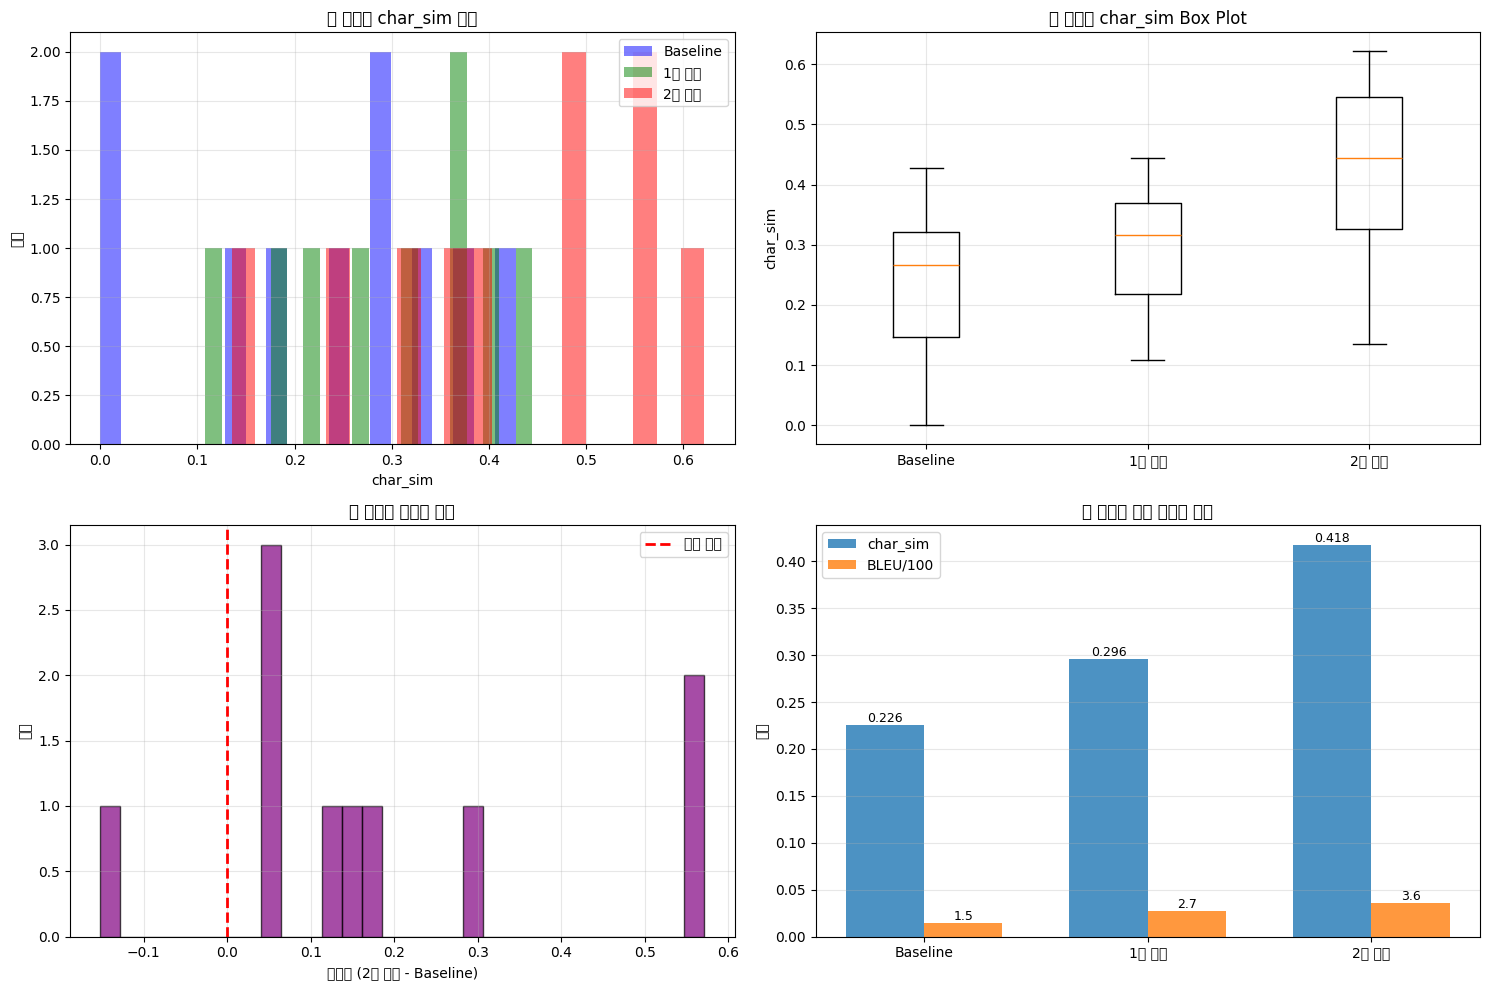

✅ 시각화 완료!


In [38]:
# ========== 5. 시각화: 버전별 점수 분포 ==========
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1) char_sim 분포 비교
ax1 = axes[0, 0]
ax1.hist(baseline_ok["char_sim"].dropna(), bins=20, alpha=0.5, label="Baseline", color="blue")
ax1.hist(improved_ok["char_sim"].dropna(), bins=20, alpha=0.5, label="1차 개선", color="green")
ax1.hist(v21_ok["char_sim"].dropna(), bins=20, alpha=0.5, label="2차 개선", color="red")
ax1.set_xlabel("char_sim")
ax1.set_ylabel("빈도")
ax1.set_title("📊 버전별 char_sim 분포")
ax1.legend()
ax1.grid(alpha=0.3)

# 2) Box plot 비교
ax2 = axes[0, 1]
box_data = [
    baseline_ok["char_sim"].dropna(),
    improved_ok["char_sim"].dropna(),
    v21_ok["char_sim"].dropna()
]
ax2.boxplot(box_data, labels=["Baseline", "1차 개선", "2차 개선"])
ax2.set_ylabel("char_sim")
ax2.set_title("📦 버전별 char_sim Box Plot")
ax2.grid(alpha=0.3)

# 3) 개선폭 분포
ax3 = axes[1, 0]
ax3.hist(compare_all["개선_2차"].dropna(), bins=30, alpha=0.7, color="purple", edgecolor="black")
ax3.axvline(0, color="red", linestyle="--", linewidth=2, label="변화 없음")
ax3.set_xlabel("개선폭 (2차 개선 - Baseline)")
ax3.set_ylabel("빈도")
ax3.set_title("📈 샘플별 개선폭 분포")
ax3.legend()
ax3.grid(alpha=0.3)

# 4) 버전별 평균 메트릭 막대 그래프
ax4 = axes[1, 1]
versions = ["Baseline", "1차 개선", "2차 개선"]
char_sim_means = [
    baseline_ok["char_sim"].mean(),
    improved_ok["char_sim"].mean(),
    v21_ok["char_sim"].mean()
]
bleu_means = [
    baseline_ok["bleu"].mean() if "bleu" in baseline_ok.columns else 0,
    improved_ok["bleu"].mean() if "bleu" in improved_ok.columns else 0,
    v21_ok["bleu"].mean() if "bleu" in v21_ok.columns else 0,
]

x = np.arange(len(versions))
width = 0.35

bars1 = ax4.bar(x - width/2, char_sim_means, width, label="char_sim", alpha=0.8)
bars2 = ax4.bar(x + width/2, [b/100 for b in bleu_means], width, label="BLEU/100", alpha=0.8)

ax4.set_ylabel("점수")
ax4.set_title("📊 버전별 평균 메트릭 비교")
ax4.set_xticks(x)
ax4.set_xticklabels(versions)
ax4.legend()
ax4.grid(alpha=0.3, axis="y")

# 값 표시
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax4.text(bar1.get_x() + bar1.get_width()/2., height1,
             f'{height1:.3f}', ha='center', va='bottom', fontsize=9)
    ax4.text(bar2.get_x() + bar2.get_width()/2., height2,
             f'{bleu_means[i]:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("✅ 시각화 완료!")


In [39]:
# ========== 6. 최종 결과 저장 ==========

# 비교 테이블 저장
compare_output = "./comparison_all_versions.csv"
compare_all.to_csv(compare_output, index=False, encoding="utf-8-sig")
print(f"✅ 샘플별 비교 결과 저장: {compare_output}")

# 요약 테이블 저장
summary_output = "./summary_all_versions.csv"
summary_df.to_csv(summary_output, index=False, encoding="utf-8-sig")
print(f"✅ 버전별 요약 저장: {summary_output}")

# 최종 리포트 출력
print("\n" + "="*100)
print("🎯 최종 결론")
print("="*100)

best_version = summary_df.loc[summary_df["char_sim_평균"].idxmax(), "버전"]
best_score = summary_df.loc[summary_df["char_sim_평균"].idxmax(), "char_sim_평균"]

print(f"\n🏆 최고 성능 버전: {best_version}")
print(f"   - char_sim 평균: {best_score:.4f}")

baseline_score = summary_df.loc[summary_df["버전"] == "Baseline", "char_sim_평균"].values[0]
final_improvement = ((best_score - baseline_score) / baseline_score) * 100

print(f"\n📈 Baseline 대비 최종 개선율: {final_improvement:+.2f}%")
print(f"   ({baseline_score:.4f} → {best_score:.4f})")

# 각 버전의 특징
print("\n📋 버전별 특징:")
for _, row in summary_df.iterrows():
    print(f"\n🔹 {row['버전']}:")
    print(f"   - 샘플수: {row['샘플수']}개")
    print(f"   - char_sim: {row['char_sim_평균']:.4f}")
    print(f"   - 빈 결과: {row['빈결과_비율']:.2%}")
    print(f"   - 한글 포함: {row['한글포함_비율']:.2%}")
    print(f"   - 일본어 혼입: {row['일본어혼입_비율']:.2%}")


✅ 샘플별 비교 결과 저장: ./comparison_all_versions.csv
✅ 버전별 요약 저장: ./summary_all_versions.csv

🎯 최종 결론

🏆 최고 성능 버전: 2차 개선
   - char_sim 평균: 0.4179

📈 Baseline 대비 최종 개선율: +84.99%
   (0.2259 → 0.4179)

📋 버전별 특징:

🔹 Baseline:
   - 샘플수: 10개
   - char_sim: 0.2259
   - 빈 결과: 0.00%
   - 한글 포함: 80.00%
   - 일본어 혼입: 60.00%

🔹 1차 개선:
   - 샘플수: 9개
   - char_sim: 0.2962
   - 빈 결과: 0.00%
   - 한글 포함: 88.89%
   - 일본어 혼입: 0.00%

🔹 2차 개선:
   - 샘플수: 10개
   - char_sim: 0.4179
   - 빈 결과: 0.00%
   - 한글 포함: 100.00%
   - 일본어 혼입: 50.00%
